## Problem Statement
This case study is to predict Batsman Performance in IPL. Decision tree and Random Forest regressor is used for the prediction.

## Data Definition

**Venue**: Venue of the Match Played by the Batsman ----> (str)    

**innings**: Inning no. he or she Played (i.e., 1 or 2) ----> (int)

**batter**: Name of tha Batsman ----> (str) 
 
**bat start**: Batting Rolling average of the Batsman at the time of match started (Window=3) ----> (float)
    
**Type**: Type of the Player (i.e., Batsman or All Rounder or Bowler) ----> (str)

**Bat_Style**: Batting Style of the Player (i.e., Right Hand or Left Hand) ----> (str)
    
**Team**: The Team, Batsman had Played for ----> (str)
    
**Opp_Team**: The Team, Batsman had faced ----> (str)
    
**Position**: Batting order of the Batsman (i.e., from 1 to 11) ----> (int)

**Bowler**: Bowling Rolling average of the opponet at the time of match started (Window=3) ----> (float)

**Performance Bat**: Performance of the Batsman at the end of the match ----> (float)
   

## Table of Content
**[1. Import Libraries](#1.-Import-Libraries)**

**[2. Read Data](#2.-Read-Data)**

**[3. Mathematicatical Computation](#3.-Mathematical-Computation)**
   - [3.1 Fill Batsman Points](#3.1-Fill-Batsman-Points)
   - [3.2 Fill Bowler Points](#3.2-Fill-Bowler-Points)
   - [3.3 Performance Measure](#3.3-Performance-Measure)
   - [3.4 Get Overall Data](#3.4-Get-Overall-Data)
   - [3.5 Players Performance by match](#3.5-Players-Performance-by-match)
   - [3.6 Player Average Performance](#3.6-Player-Average-Performance)
   - [3.7 Player Rolling Average Performance](#3.7-Player-Rolling-Average-Performance)
   - [3.8 Prepare ML Dataset for Batsman](#3.8-Prepare-ML-Dataset-for-Batsman)

**[4. Prepare and Analyse the Data](#4.-Prepare-and-Analyse-the-Data)**
   - [4.1 Understand Data](#4.1-Understand-Data)   
        - [4.1.1 Data Type](#4.1.1-Data-Type)
        - [4.1.2 Feature Engineering](#4.1.2-Feature-Engineering)
        - [4.1.3 Summary Statistics](#4.1.3-Summary-Statistics)
   - [4.2 Data Conversion](#4.2-Data-Conversion)
   - [4.3 Handling Missing Values](#4.3-Handling-Missing-Values)
   - [4.4 Handling Outliers](#4.4-Handling-Outliers)
   - [4.5 Study Correlation](#4.5-Study-Correlation)
   - [4.6 Feature Scaling](#4.6-Feature-Scaling)
        - [4.6.1 One Hot Encoding](#4.6.1-One-Hot-Encoding)
        - [4.6.2 Normalization](#4.6.2-Normalization)

**[5. Random Forest](#5.-Random-Forest)**
   - [5.1 Random Forest Model](#5.1-Random-Forest-Model)
   - [5.2 Random Forest with GridSearchCV](#5.2-Random-Forest-with-GridSearchCV)
   
**[6. Conclusion and Interpretation](#6.-Conclusion-and-Interpretation)**


In [1]:
! pip install --upgrade category_encoders

## 1. Import Libraries

In [2]:
# suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# import 'is_string_dtype' and 'is_numeric_dtype' to check the data type 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm


# 'SciPy' is used to perform scientific computations
from scipy.stats import jarque_bera
from scipy import stats

from sklearn.preprocessing import StandardScaler
from category_encoders import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

## 2. Read Data

In [4]:
ipl_data = pd.read_excel("C:\\Users\\sathiygg\\Documents\\Cricket Project\\RAW DATA\\IPL_Ball_by_Ball_2002_2022.xlsx")
Player_stats = pd.read_excel("C:\\Users\\sathiygg\\Documents\\Cricket Project\\RAW DATA\\Player stats 2008_2022.xlsx")
IPL_matches = pd.read_csv("C:\\Users\\sathiygg\\Documents\\Cricket Project\\RAW DATA\\IPL_Matches_2008_2022.csv")

## 3. Mathematical Computation

In [5]:
ipl_data=ipl_data.fillna(" ")

## 3.1 Fill Batsman Points

In [6]:
for i in ipl_data["ID"].unique():
    df = ipl_data[ipl_data["ID"]==i].reset_index(drop=True).copy()
    
    df["Batsman Run"]=0
    df["Boundary Bonus"]=0
    df["Six Bonus"]=0
    df["30+"]=0
    df["50+"]=0
    df["100+"]=0
    df["Duck"]=0
    df["No.of Balls Batter"]=0
    df["Strike rate"]=0
    df["Strike 170 above"]=0
    df["Strike 150-170"]=0
    df["Strike 130-150"]=0
    df["Strike 60-70"]=0
    df["Strike 50-60"]=0
    df["Strike 50 below"]=0
    df["Batsman Point"]=0

    df=df.sort_values(by=["batter","innings","overs","ballnumber"]).reset_index(drop=True)
    
    for j in df.index:
        try:
            if df.loc[j,"batter"]==df.loc[j-1,"batter"]:
                
                df.loc[j,"Batsman Run"]= df.loc[j-1,"Batsman Run"]+df.loc[j,"batsman_run"]
                
                if (df.loc[j,"extra_type"]=="wides") or (df.loc[j,"extra_type"]=="noballs"):
                    df.loc[j,"No.of Balls Batter"]=df.loc[j-1,"No.of Balls Batter"]
                else:
                    df.loc[j,"No.of Balls Batter"]=df.loc[j-1,"No.of Balls Batter"]+1
                    
            else:
                
                df.loc[j,"Batsman Run"]=df.loc[j,"batsman_run"]
                
                if (df.loc[j,"extra_type"]=="wides") or (df.loc[j,"extra_type"]=="noballs"):
                    df.loc[j,"No.of Balls Batter"]=0
                else:
                    df.loc[j,"No.of Balls Batter"]=1
                    
            
                    
        except:
            
            df.loc[j,"Batsman Run"]=df.loc[j,"batsman_run"]
            
            if (df.loc[j,"extra_type"]=="wides") or (df.loc[j,"extra_type"]=="noballs"):
                df.loc[j,"No.of Balls Batter"]=0
            else:
                df.loc[j,"No.of Balls Batter"]=1
                
        try:
            df.loc[j,"Strike rate"]=(df.loc[j,"Batsman Run"]*100)/df.loc[j,"No.of Balls Batter"]
        except:
            df.loc[j,"Strike rate"]=0
            
    df=df.fillna(0).reset_index(drop=True)
    for j in df.index:
        if df.loc[j,"batsman_run"]==4:
            df.loc[j,"Boundary Bonus"]=1
            
        if df.loc[j,"batsman_run"]==6:
            df.loc[j,"Six Bonus"]=2
            
        if df.loc[j,"Batsman Run"]>100:
            df.loc[j,"100+"]=8
            
        if df.loc[j,"100+"]==0:
            if 50<=df.loc[j,"Batsman Run"]<100:
                df.loc[j,"50+"]=8
                
        if (df.loc[j,"50+"]==0 and df.loc[j,"100+"]==0):
            if 30<=df.loc[j,"Batsman Run"]<50:
                df.loc[j,"30+"]=4
                
        if (df.loc[j,"batter"]==df.loc[j,"player_out"]) & (df.loc[j,"Batsman Run"]==0):
            df.loc[j,"Duck"] = -2
            
        if df.loc[j,"Strike rate"]>170:
            df.loc[j,"Strike 170 above"]=6
            
        if (150<df.loc[j,"Strike rate"]<=170):
            df.loc[j,"Strike 170 above"]=4
            
        if (130<df.loc[j,"Strike rate"]<=150):
            df.loc[j,"Strike 170 above"]=2
            
        if (60<=df.loc[j,"Strike rate"]<70):
            df.loc[j,"Strike 170 above"]=-2
            
        if (50<=df.loc[j,"Strike rate"]<60):
            df.loc[j,"Strike 170 above"]=-4
            
        if (df.loc[j,"Strike rate"]<50):
            df.loc[j,"Strike 170 above"]=-6
        
    df["Batsman Point"]=df[["Batsman Run","Boundary Bonus","Six Bonus","30+","50+","100+","Duck","Strike 170 above","Strike 150-170","Strike 130-150","Strike 60-70","Strike 50-60","Strike 50 below"]].sum(axis=1)
    df=df.sort_values(by=["innings","overs","ballnumber"]).reset_index(drop=True)
    globals()['Match_%s'%i]=df.copy()

## 3.2 Fill Bowler Points

In [7]:
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    df["Ball Bowled"]=0
    df["Runs"]=0
    df["Economy"]=0
    df["Wicket"]=0
    df["LBW/Bowled"]=0
    df["No.of Wickets"]=0
    df["3+"]=0
    df["4+"]=0
    df["5+"]=0
    df["No Extras"]=0
    df["No Run in Over"]=0
    df["Maiden"]=0
    df["Eco 5 below"]=0
    df["Eco 5-6"]=0
    df["Eco 6-7"]=0
    df["Eco 10-11"]=0
    df["Eco 11-12"]=0
    df["Eco 12 above"]=0
    df["Bowler point"]=0
    df=df.sort_values(by=["bowler","innings","overs","ballnumber"]).reset_index(drop=True)
    
    for j in df.index:
        
        try:            
            if df.loc[j,"bowler"]==df.loc[j-1,"bowler"]:
                if df.loc[j,"extra_type"]==" " or df.loc[j,"extra_type"]=="legbyes":
                    df.loc[j,"Ball Bowled"]=df.loc[j-1,"Ball Bowled"]+1
                else:
                    df.loc[j,"Ball Bowled"]=df.loc[j-1,"Ball Bowled"]
                    
                if df.loc[j,"extra_type"]!="legbyes":
                    df.loc[j,"Runs"]=df.loc[j-1,"Runs"]+df.loc[j,"total_run"]
                else:
                    df.loc[j,"Runs"]=df.loc[j-1,"Runs"]
                    
                if df.loc[j,"isWicketDelivery"]==1:
                    df.loc[j,"Wicket"]=df.loc[j-1,"Wicket"]+25
                else:
                    df.loc[j,"Wicket"]=df.loc[j-1,"Wicket"]
                
                if df.loc[j,"kind"]=="bowled" or df.loc[j,"kind"]=="lbw":
                    df.loc[j,"LBW/Bowled"]=df.loc[j-1,"LBW/Bowled"]+8
                else:
                    df.loc[j,"LBW/Bowled"]=df.loc[j-1,"LBW/Bowled"]
                df.loc[j,"No.of Wickets"]=df.loc[j-1,"No.of Wickets"] + df.loc[j,"isWicketDelivery"]
                    
            else:
                
                if df.loc[j,"extras_run"]==0 or df.loc[j,"non_boundary"]==0:
                    df.loc[j,"Ball Bowled"]=1
                else:
                    df.loc[j,"Ball Bowled"]=0
                    
                if df.loc[j,"extra_type"]!="legbyes":
                    df.loc[j,"Runs"]=df.loc[j,"total_run"]
                else:
                    df.loc[j,"Runs"]=0
                    
                if df.loc[j,"isWicketDelivery"]==1:
                    df.loc[j,"Wicket"]=25
                else:
                    df.loc[j,"Wicket"]=0
                    
                if df.loc[j,"kind"]=="bowled" or df.loc[j,"kind"]=="lbw":
                    df.loc[j,"LBW/Bowled"]=8
                else:
                    df.loc[j,"LBW/Bowled"]=0
                
                df.loc[j,"No.of Wickets"]=df.loc[j,"isWicketDelivery"]
                    
                
        except:
            
            if df.loc[j,"extras_run"]==0 or df.loc[j,"non_boundary"]==0:
                df.loc[j,"Ball Bowled"]=1
            else:
                df.loc[j,"Ball Bowled"]=0
                
            if df.loc[j,"extra_type"]!="legbyes":
                df.loc[j,"Runs"]=df.loc[j,"total_run"]
            else:
                df.loc[j,"Runs"]=0
                
            if df.loc[j,"isWicketDelivery"]==1:
                df.loc[j,"Wicket"]=25
            else:
                df.loc[j,"Wicket"]=0
                
            if df.loc[j,"kind"]=="bowled" or df.loc[j,"kind"]=="lbw":
                df.loc[j,"LBW/Bowled"]=8
            else:
                df.loc[j,"LBW/Bowled"]=0
            
            df.loc[j,"No.of Wickets"]=df.loc[j,"isWicketDelivery"]
                
        try:
            df.loc[j,"Economy"]=(df.loc[j,"Runs"]*6)/df.loc[j,"Ball Bowled"]
        except:
            df.loc[j,"Economy"]=12
            
        if df.loc[j,"isWicketDelivery"]>4:
            df.loc[j,"5+"]=16
            
        if df.loc[j,"5+"]==0:
            if df.loc[j,"isWicketDelivery"]>3:
                df.loc[j,"4+"]=8
                
        if df.loc[j,"5+"]==0 & df.loc[j,"4+"]==0:
            if df.loc[j,"isWicketDelivery"]>3:
                df.loc[j,"3+"]=4
        
        if df.loc[j,"ballnumber"]==6:
            try:
                if (df.loc[j-5,"ballnumber"]==1 & df.loc[j+1,"ballnumber"]==1):
                    df.loc[j,"No Extras"]=1
                else:
                    df.loc[j,"No Extras"]=0
            except:
                try:
                    if df.loc[j-5,"ballnumber"]==1:
                        df.loc[j,"No Extras"]=1
                    else:
                        df.loc[j,"No Extras"]=0
                except:
                    df.loc[j,"No Extras"]=1
                    
        else:
            df.loc[j,"No Extras"]=0
    
        if df.loc[j,"ballnumber"]==1:
            df.loc[j,"No Run in Over"]=df.loc[j,"total_run"]
        
        else:
            try:
                df.loc[j,"No Run in Over"]=df.loc[j-1,"No Run in Over"]+df.loc[j,"total_run"]
            except:
                df.loc[j,"No Run in Over"]=df.loc[j,"total_run"]
        try:            
            if df.loc[j,"bowler"]==df.loc[j-1,"bowler"]:
                if df.loc[j,"No Extras"]!=1:
                    df.loc[j,"Maiden"]=df.loc[j-1,"Maiden"]
                else:
                    if df.loc[j,"No Run in Over"]==0:
                        df.loc[j,"Maiden"]=df.loc[j-1,"Maiden"]+12
                    else:
                        df.loc[j,"Maiden"]=df.loc[j-1,"Maiden"]
            else:
                df.loc[j,"Maiden"]=0
        except:
            df.loc[j,"Maiden"]=0
        
        
        if df.loc[j,"Economy"]<5:
            df.loc[j,"Eco 5 below"]=6
            
        if 5<=df.loc[j,"Economy"]<6:
            df.loc[j,"Eco 5-6"]= 4
            
        if 6<=df.loc[j,"Economy"]<7:
            df.loc[j,"Eco 6-7"]= 2
            
        if 10<=df.loc[j,"Economy"]<11:
            df.loc[j,"Eco 10-11"]= -2
            
        if 11<=df.loc[j,"Economy"]<12:
            df.loc[j,"Eco 11-12"]= -4
            
        if df.loc[j,"Economy"]>=12:
            df.loc[j,"Eco 12 above"]= -6
    
    
    df["Bowler point"]=df[["Wicket","LBW/Bowled","3+","4+","5+","Maiden","Eco 5 below","Eco 5-6","Eco 6-7","Eco 10-11","Eco 11-12","Eco 12 above"]].sum(axis=1)      
    df=df.sort_values(by=["innings","overs","ballnumber"]).reset_index(drop=True)
    globals()['Match_%s'%i]=df.copy()       
    

## 3.3 Performance Measure

In [8]:
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    df["Batsman Diff"]=0
    df["Bowler Diff"]=0
    df["Change of Batsman"]=0
    df["Change of Bowler"]=0
    
    df=df.sort_values(by=["batter","innings","overs","ballnumber"]).reset_index(drop=True)
    for j in df.index:
        try:
            if df.loc[j,"batter"]==df.loc[j-1,"batter"]:
                df.loc[j,"Batsman Diff"]=df.loc[j,"Batsman Point"]-df.loc[j-1,"Batsman Point"]
            else:
                df.loc[j,"Batsman Diff"]=df.loc[j,"Batsman Point"]
        except:
            df.loc[j,"Batsman Diff"]=df.loc[j,"Batsman Point"]
    
    df=df.sort_values(by=["bowler","innings","overs","ballnumber"]).reset_index(drop=True)
    for j in df.index:   
        try:
            if df.loc[j,"bowler"]==df.loc[j-1,"bowler"]:
                df.loc[j,"Bowler Diff"]=df.loc[j,"Bowler point"]-df.loc[j-1,"Bowler point"]
            else:
                df.loc[j,"Bowler Diff"]=df.loc[j,"Bowler point"]
        except:
            df.loc[j,"Bowler Diff"]=df.loc[j,"Bowler point"]
        if np.abs(df.loc[j,"Bowler Diff"])!=0:
            df.loc[j,"Change of Batsman"]=df.loc[j,"Batsman Diff"]/np.abs(df.loc[j,"Bowler Diff"])
        else:
            df.loc[j,"Change of Batsman"]=df.loc[j,"Batsman Diff"]
        if np.abs(df.loc[j,"Batsman Diff"])!=0:
             df.loc[j,"Change of Bowler"]=df.loc[j,"Bowler Diff"]/np.abs(df.loc[j,"Batsman Diff"])
        else:
            df.loc[j,"Change of Bowler"]=df.loc[j,"Bowler Diff"]
        
    df=df.sort_values(by=["innings","overs","ballnumber"]).reset_index(drop=True)
    globals()['Match_%s'%i]=df.copy()
    

In [9]:
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    df["Performance Bat"]=0
    df["Performance Bowl"]=0
    df=df.sort_values(by=["batter","innings","overs","ballnumber"]).reset_index(drop=True) 
    for j in df.index:
        try:
            if df.loc[j,"batter"]==df.loc[j-1,"batter"]:
                df.loc[j,"Performance Bat"]=df.loc[j-1,"Performance Bat"]+df.loc[j,"Change of Batsman"]
            else:
                df.loc[j,"Performance Bat"]=100+df.loc[j,"Change of Batsman"]
        except:
            df.loc[j,"Performance Bat"]=100+df.loc[j,"Change of Batsman"]
    df=df.sort_values(by=["bowler","innings","overs","ballnumber"]).reset_index(drop=True)
    for j in df.index:
        try:
            if df.loc[j,"bowler"]==df.loc[j-1,"bowler"]:
                df.loc[j,"Performance Bowl"]=df.loc[j-1,"Performance Bowl"]+df.loc[j,"Change of Bowler"]
            else:
                df.loc[j,"Performance Bowl"]=100+df.loc[j,"Change of Bowler"]
        except:
            df.loc[j,"Performance Bowl"]=100+df.loc[j,"Change of Bowler"]
    df=df.sort_values(by=["innings","overs","ballnumber"]).reset_index(drop=True)
    globals()['Match_%s'%i]=df.copy()

## 3.4 Get Overall Data

In [10]:
Overall_Data=pd.DataFrame()
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    Overall_Data=Overall_Data.append(df, ignore_index=True)

## 3.5 Players Performance by match

In [11]:
Batsman_Performance_by_match=pd.DataFrame()
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    for j in df["batter"].unique():
        index=df[df["batter"]==str(j)].index.max()
        Batsman_Performance_by_match=Batsman_Performance_by_match.append(df.iloc[index]).reset_index(drop=True)
        

In [12]:
Bowler_Performance_by_match=pd.DataFrame()
for i in ipl_data["ID"].unique():
    df=globals()['Match_%s'%i].copy()
    for j in df["bowler"].unique():
        index=df[df["bowler"]==str(j)].index.max()
        Bowler_Performance_by_match=Bowler_Performance_by_match.append(df.iloc[index]).reset_index(drop=True)

## 3.6 Player Average Performance

In [13]:
Batsman_Avg_Performance=pd.DataFrame(columns=["batter","Performance Bat"])
Batsman_Avg_Performance=Batsman_Performance_by_match.groupby("batter")["Performance Bat"].mean().to_frame(name="Performance Bat")
Batsman_Avg_Performance=Batsman_Avg_Performance.fillna("A").reset_index()

In [14]:
Bowler_Avg_Performance=pd.DataFrame()
Bowler_Avg_Performance=Bowler_Performance_by_match.groupby("bowler")["Performance Bowl"].mean().to_frame(name="Performance Bowl")
Bowler_Avg_Performance=Bowler_Avg_Performance.fillna("A").reset_index()

## 3.7 Player Rolling Average Performance

In [15]:
Batsman_Roll_Avg=Batsman_Performance_by_match.set_index("ID").sort_index()
Batsman_Roll_Avg=Batsman_Roll_Avg.groupby("batter").rolling(3).mean()["Performance Bat"].to_frame(name="Performance Bat")
Batsman_Roll_Avg=Batsman_Roll_Avg.fillna("A").reset_index()

In [16]:
Bowler_Roll_Avg=Bowler_Performance_by_match.set_index("ID").sort_index()
Bowler_Roll_Avg=Bowler_Roll_Avg.groupby("bowler").rolling(3).mean()["Performance Bowl"].to_frame(name="Performance Bowl")
Bowler_Roll_Avg=Bowler_Roll_Avg.fillna("A").reset_index()

## 3.8 Prepare ML Dataset for Batsman

In [17]:
ML_Data_Bat=Batsman_Performance_by_match[['ID', 'innings',  'batter','BattingTeam','Performance Bat']]

In [18]:
ML_Data_Bat=pd.merge(ML_Data_Bat, IPL_matches, on="ID", how="left")

In [19]:
ML_Data_Bat=ML_Data_Bat.drop(['City','Date', 'Season', 'MatchNumber',
       'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy',
       'Margin', 'method', 'Player_of_Match', 'Team1Players', 'Team2Players',
       'Umpire1', 'Umpire2'],axis=1)

In [20]:
df=ML_Data_Bat.copy()
for i in df.index:
    if df.loc[i,"BattingTeam"]==df.loc[i, "Team1"]:
        df.loc[i, "Position1"]=df.loc[i, "Player1"]
        df.loc[i, "Position2"]=df.loc[i, "Player2"]
        df.loc[i, "Position3"]=df.loc[i, "Player3"]
        df.loc[i, "Position4"]=df.loc[i, "Player4"]
        df.loc[i, "Position5"]=df.loc[i, "Player5"]
        df.loc[i, "Position6"]=df.loc[i, "Player6"]
        df.loc[i, "Position7"]=df.loc[i, "Player7"]
        df.loc[i, "Position8"]=df.loc[i, "Player8"]
        df.loc[i, "Position9"]=df.loc[i, "Player9"]
        df.loc[i, "Position10"]=df.loc[i, "Player10"]
        df.loc[i, "Position11"]=df.loc[i, "Player11"]
        df.loc[i, "Opp1"]=df.loc[i, "Player12"]
        df.loc[i, "Opp2"]=df.loc[i, "Player13"]
        df.loc[i, "Opp3"]=df.loc[i, "Player14"]
        df.loc[i, "Opp4"]=df.loc[i, "Player15"]
        df.loc[i, "Opp5"]=df.loc[i, "Player16"]
        df.loc[i, "Opp6"]=df.loc[i, "Player17"]
        df.loc[i, "Opp7"]=df.loc[i, "Player18"]
        df.loc[i, "Opp8"]=df.loc[i, "Player19"]
        df.loc[i, "Opp9"]=df.loc[i, "Player20"]
        df.loc[i, "Opp10"]=df.loc[i, "Player21"]
        df.loc[i, "Opp11"]=df.loc[i, "Player22"]
        df.loc[i, "Opp_Team"]=df.loc[i, "Team2"]
    else:
        df.loc[i, "Position1"]=df.loc[i, "Player12"]
        df.loc[i, "Position2"]=df.loc[i, "Player13"]
        df.loc[i, "Position3"]=df.loc[i, "Player14"]
        df.loc[i, "Position4"]=df.loc[i, "Player15"]
        df.loc[i, "Position5"]=df.loc[i, "Player16"]
        df.loc[i, "Position6"]=df.loc[i, "Player17"]
        df.loc[i, "Position7"]=df.loc[i, "Player18"]
        df.loc[i, "Position8"]=df.loc[i, "Player19"]
        df.loc[i, "Position9"]=df.loc[i, "Player20"]
        df.loc[i, "Position10"]=df.loc[i, "Player21"]
        df.loc[i, "Position11"]=df.loc[i, "Player22"]
        df.loc[i, "Opp1"]=df.loc[i, "Player1"]
        df.loc[i, "Opp2"]=df.loc[i, "Player2"]
        df.loc[i, "Opp3"]=df.loc[i, "Player3"]
        df.loc[i, "Opp4"]=df.loc[i, "Player4"]
        df.loc[i, "Opp5"]=df.loc[i, "Player5"]
        df.loc[i, "Opp6"]=df.loc[i, "Player6"]
        df.loc[i, "Opp7"]=df.loc[i, "Player7"]
        df.loc[i, "Opp8"]=df.loc[i, "Player8"]
        df.loc[i, "Opp9"]=df.loc[i, "Player9"]
        df.loc[i, "Opp10"]=df.loc[i, "Player10"]
        df.loc[i, "Opp11"]=df.loc[i, "Player11"]
        df.loc[i, "Opp_Team"]=df.loc[i, "Team1"]

ML_Data_Bat=df.copy()



In [21]:
ML_Data_Bat=ML_Data_Bat.drop(['Team1','Team2','Player1', 'Player2', 'Player3', 'Player4', 'Player5',
       'Player6', 'Player7', 'Player8', 'Player9', 'Player10', 'Player11',
       'Player12', 'Player13', 'Player14', 'Player15', 'Player16', 'Player17',
       'Player18', 'Player19', 'Player20', 'Player21', 'Player22'],axis=1)

In [22]:
df=ML_Data_Bat.copy()

In [24]:
for i in df.index:
    ID=df.loc[i,"ID"]
    for j in range(1,12):
        col_name="Opp"+str(j)
        player=df.loc[i,col_name]
        try:
            roll=Bowler_Roll_Avg[(Bowler_Roll_Avg["bowler"]==player)&(Bowler_Roll_Avg["ID"]==ID)].values[0,2]
            avg=Bowler_Avg_Performance[Bowler_Avg_Performance["bowler"]==player].values[0,1]
            if roll=="A":
                df.loc[i,col_name]=avg
            else:
                df.loc[i,col_name]=roll
        except:
            df.loc[i,col_name]="A"
    
    

In [25]:
df["Bat_Start"]=""

In [26]:
for i in df.index:
    ID=df.loc[i,"ID"]
    col_name="batter"
    col_name1="Bat_Start"
    player=df.loc[i,col_name]
    try:
        roll=Batsman_Roll_Avg[(Batsman_Roll_Avg["batter"]==player)&(Batsman_Roll_Avg["ID"]==ID)].values[0,2]
        avg=Batsman_Avg_Performance[Batsman_Avg_Performance["batter"]==player].values[0,1]
        if roll=="A":
            df.loc[i,col_name1]=avg
        else:
            df.loc[i,col_name1]=roll
    except:
        df.loc[i,col_name1]="A"

In [27]:
for i in range(1,12):
    new_col="Bowler"+str(i)
    old_col="Opp"+str(12-i)
    df[new_col]=df[old_col]

In [28]:
for i in df.index:
    for j in range(1,12):
        try:
            if df.loc[i,"Bowler"+str(j)]=="A":
                if df.loc[i,"Bowler"+str(j+1)]=="A":
                    if df.loc[i,"Bowler"+str(j+2)]=="A":
                        if df.loc[i,"Bowler"+str(j+3)]=="A":
                            if df.loc[i,"Bowler"+str(j+4)]=="A":
                                if df.loc[i,"Bowler"+str(j+5)]=="A":
                                    if df.loc[i,"Bowler"+str(j+6)]=="A":
                                        if df.loc[i,"Bowler"+str(j+7)]=="A":
                                            if df.loc[i,"Bowler"+str(j+8)]=="A":
                                                df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+9)]
                                            else:
                                                df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+8)]
                                        else:
                                            df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+7)]
                                    else:
                                        df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+6)]
                                else:
                                    df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+5)]
                            else:
                                df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+4)]
                        else:
                            df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+3)]
                    else:
                        df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+2)]
                else:
                    df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j+1)]
            else:
                df.loc[i,"Bowler"+str(j)]=df.loc[i,"Bowler"+str(j)]
        except:
            df.loc[i,"Bowler"+str(j)]=""
      
      

In [29]:
for i in df.index:
    for j in range(1,12):
        batter="batter"
        Position="Position"+str(j)
        if df.loc[i,"batter"]==df.loc[i,Position]:
            df.loc[i,Position]=1
        else:
            df.loc[i,Position]=0

In [30]:
ML_Data_Bat=df.drop(['Opp1', 'Opp2', 'Opp3', 'Opp4', 'Opp5', 'Opp6', 'Opp7',
       'Opp8', 'Opp9', 'Opp10', 'Opp11'],axis=1)

In [31]:
for i in ML_Data_Bat.index:
    batter_name=ML_Data_Bat.loc[i,"batter"]
    ML_Data_Bat.loc[i,"Type"]=Player_stats[Player_stats["Data Name"]==batter_name].values[0,1]
    ML_Data_Bat.loc[i,"Batting Style"]=Player_stats[Player_stats["Data Name"]==batter_name].values[0,2]

In [32]:
ML_Data_Bat.head()

ID  innings       batter       BattingTeam  Performance Bat  \
0  1312200        1  YBK Jaiswal  Rajasthan Royals       111.420000   
1  1312200        1   JC Buttler  Rajasthan Royals       129.416667   
2  1312200        1    SV Samson  Rajasthan Royals       103.139368   
3  1312200        1   D Padikkal  Rajasthan Royals        96.000000   
4  1312200        1   SO Hetmyer  Rajasthan Royals       111.960000   

                              Venue Position1 Position2 Position3 Position4  \
0  Narendra Modi Stadium, Ahmedabad         1         0         0         0   
1  Narendra Modi Stadium, Ahmedabad         0         1         0         0   
2  Narendra Modi Stadium, Ahmedabad         0         0         1         0   
3  Narendra Modi Stadium, Ahmedabad         0         0         0         1   
4  Narendra Modi Stadium, Ahmedabad         0         0         0         0   

  Position5 Position6 Position7 Position8 Position9 Position10 Position11  \
0         0         0         0         0         0          0          0   
1         0         0         0         0         0          0          0   
2         0         0         0         0         0          0          0   
3         0         0         0         0         0          0          0   
4         1         0         0         0         0          0          0   

         Opp_Team   Bat_Start     Bowler1     Bowler2     Bowler3     Bowler4  \
0  Gujarat Titans   108.72642  124.492358  127.596681  121.647523  120.721032   
1  Gujarat Titans  156.542271  124.492358  127.596681  121.647523  120.721032   
2  Gujarat Titans  115.963123  124.492358  127.596681  121.647523  120.721032   
3  Gujarat Titans  109.833333  124.492358  127.596681  121.647523  120.721032   
4  Gujarat Titans      105.46  124.492358  127.596681  121.647523  120.721032   

     Bowler5    Bowler6    Bowler7    Bowler8 Bowler9 Bowler10 Bowler11  \
0  137.03254  136.82328  136.82328  136.82328                             
1  137.03254  136.82328  136.82328  136.82328                             
2  137.03254  136.82328  136.82328  136.82328                             
3  137.03254  136.82328  136.82328  136.82328                             
4  137.03254  136.82328  136.82328  136.82328                             

             Type Batting Style  
0        Batsman    Left Handed  
1  Wicket-Keeper   Right Handed  
2  Wicket-Keeper   Right Handed  
3        Batsman    Left Handed  
4        Batsman    Left Handed

In [33]:
df=ML_Data_Bat.copy()

## 4. Prepare and Analyse the Data

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here we will analyze and prepare data to perform regression techniques:
1. Check dimensions of the dataframe in terms of rows and columns
2. Check the data types. If not as per business context, change the data types
3. Study Summary Statistics
4. Distribution of Variables
5. Analyze relationship between numeric variables
6. Check for missing values
7. Study correlation
8. Analyze relationship between numeric and categoric variables

Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.

## 4.1 Understand Data

**Let us now see the number of variables and observations in the data.**

In [34]:
df.shape

(14229, 32)

### 4.1.1 Data Type

In [35]:
df.dtypes

ID                   int64
innings              int64
batter              object
BattingTeam         object
Performance Bat    float64
Venue               object
Position1           object
Position2           object
Position3           object
Position4           object
Position5           object
Position6           object
Position7           object
Position8           object
Position9           object
Position10          object
Position11          object
Opp_Team            object
Bat_Start           object
Bowler1             object
Bowler2             object
Bowler3             object
Bowler4             object
Bowler5             object
Bowler6             object
Bowler7             object
Bowler8             object
Bowler9             object
Bowler10            object
Bowler11            object
Type                object
Batting Style       object
dtype: object

In [36]:
df.select_dtypes(include=["object"]).columns

Index(['batter', 'BattingTeam', 'Venue', 'Position1', 'Position2', 'Position3',
       'Position4', 'Position5', 'Position6', 'Position7', 'Position8',
       'Position9', 'Position10', 'Position11', 'Opp_Team', 'Bat_Start',
       'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6',
       'Bowler7', 'Bowler8', 'Bowler9', 'Bowler10', 'Bowler11', 'Type',
       'Batting Style'],
      dtype='object')

In [37]:
int_col=['Position1', 'Position2', 'Position3',
       'Position4', 'Position5', 'Position6', 'Position7', 'Position8',
       'Position9', 'Position10', 'Position11']

In [38]:
for col in int_col:
    df[col]=df[col].astype(int)

In [39]:
df.select_dtypes(include=["object"]).columns

Index(['batter', 'BattingTeam', 'Venue', 'Opp_Team', 'Bat_Start', 'Bowler1',
       'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7',
       'Bowler8', 'Bowler9', 'Bowler10', 'Bowler11', 'Type', 'Batting Style'],
      dtype='object')

In [40]:
float_col=['Bat_Start', 'Bowler1',
       'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7',
       'Bowler8', 'Bowler9', 'Bowler10', 'Bowler11']

In [41]:
df=df.replace('',np.nan, regex=True)

In [42]:
for col in float_col:
    df[col]=df[col].astype(float)

In [43]:
df.dtypes

ID                   int64
innings              int64
batter              object
BattingTeam         object
Performance Bat    float64
Venue               object
Position1            int32
Position2            int32
Position3            int32
Position4            int32
Position5            int32
Position6            int32
Position7            int32
Position8            int32
Position9            int32
Position10           int32
Position11           int32
Opp_Team            object
Bat_Start          float64
Bowler1            float64
Bowler2            float64
Bowler3            float64
Bowler4            float64
Bowler5            float64
Bowler6            float64
Bowler7            float64
Bowler8            float64
Bowler9            float64
Bowler10           float64
Bowler11           float64
Type                object
Batting Style       object
dtype: object

### 4.1.2 Feature Engineering

For feature engineering, we Drop the redundant variables

In [44]:
df=df.drop(["batter","ID"],axis=1)

In [45]:
df.head()

innings       BattingTeam  Performance Bat  \
0        1  Rajasthan Royals       111.420000   
1        1  Rajasthan Royals       129.416667   
2        1  Rajasthan Royals       103.139368   
3        1  Rajasthan Royals        96.000000   
4        1  Rajasthan Royals       111.960000   

                              Venue  Position1  Position2  Position3  \
0  Narendra Modi Stadium, Ahmedabad          1          0          0   
1  Narendra Modi Stadium, Ahmedabad          0          1          0   
2  Narendra Modi Stadium, Ahmedabad          0          0          1   
3  Narendra Modi Stadium, Ahmedabad          0          0          0   
4  Narendra Modi Stadium, Ahmedabad          0          0          0   

   Position4  Position5  Position6  Position7  Position8  Position9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Position10  Position11        Opp_Team   Bat_Start     Bowler1     Bowler2  \
0           0           0  Gujarat Titans  108.726420  124.492358  127.596681   
1           0           0  Gujarat Titans  156.542271  124.492358  127.596681   
2           0           0  Gujarat Titans  115.963123  124.492358  127.596681   
3           0           0  Gujarat Titans  109.833333  124.492358  127.596681   
4           0           0  Gujarat Titans  105.460000  124.492358  127.596681   

      Bowler3     Bowler4    Bowler5    Bowler6    Bowler7    Bowler8  \
0  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
1  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
2  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
3  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
4  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   

   Bowler9  Bowler10  Bowler11            Type Batting Style  
0      NaN       NaN       NaN        Batsman    Left Handed  
1      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
2      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
3      NaN       NaN       NaN        Batsman    Left Handed  
4      NaN       NaN       NaN        Batsman    Left Handed

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14229 entries, 0 to 14228
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   innings          14229 non-null  int64  
 1   BattingTeam      14229 non-null  object 
 2   Performance Bat  14229 non-null  float64
 3   Venue            14229 non-null  object 
 4   Position1        14229 non-null  int32  
 5   Position2        14229 non-null  int32  
 6   Position3        14229 non-null  int32  
 7   Position4        14229 non-null  int32  
 8   Position5        14229 non-null  int32  
 9   Position6        14229 non-null  int32  
 10  Position7        14229 non-null  int32  
 11  Position8        14229 non-null  int32  
 12  Position9        14229 non-null  int32  
 13  Position10       14229 non-null  int32  
 14  Position11       14229 non-null  int32  
 15  Opp_Team         14229 non-null  object 
 16  Bat_Start        14229 non-null  float64
 17  Bowler1     

### 4.1.3 Summary Statistics

Here we take a look at the summary of each attribute. This includes the count, mean, the minimum and maximum values as well as some percentiles for numeric variables and count, unique, top, frequency for other variable types.

In our dataset we have both numerical and categorical variables. Now we check for summary statistics of all the variables

1. For numerical variables, use the describe()
2. For categorical variables use the describe(include='object')

In [47]:
df.describe().transpose()

count        mean        std         min         25%  \
innings          14229.0    1.489985   0.499917    1.000000    1.000000   
Performance Bat  14229.0  113.384437  16.413905   89.859524  101.000000   
Position1        14229.0    0.133390   0.340007    0.000000    0.000000   
Position2        14229.0    0.132757   0.339324    0.000000    0.000000   
Position3        14229.0    0.131843   0.338332    0.000000    0.000000   
Position4        14229.0    0.128048   0.334155    0.000000    0.000000   
Position5        14229.0    0.120950   0.326081    0.000000    0.000000   
Position6        14229.0    0.106473   0.308453    0.000000    0.000000   
Position7        14229.0    0.086373   0.280924    0.000000    0.000000   
Position8        14229.0    0.066203   0.248645    0.000000    0.000000   
Position9        14229.0    0.046736   0.211079    0.000000    0.000000   
Position10       14229.0    0.030431   0.171776    0.000000    0.000000   
Position11       14229.0    0.016797   0.128513    0.000000    0.000000   
Bat_Start        14229.0  113.473556  10.359569   93.920000  105.741456   
Bowler1          14229.0  129.846649  14.113390   98.800000  119.903301   
Bowler2          14229.0  129.515172  13.577676  100.523667  119.859524   
Bowler3          14229.0  129.378524  14.250999   99.385185  118.783718   
Bowler4          14229.0  128.003162  13.743105   99.250000  117.809524   
Bowler5          14203.0  124.667412  13.733771   99.142857  114.470563   
Bowler6          12776.0  121.355920  13.545903   99.000000  111.259241   
Bowler7          10564.0  120.930563  13.718744   98.800000  110.461508   
Bowler8           7619.0  119.911226  13.261534   99.142857  109.398084   
Bowler9           5035.0  119.956989  12.653050   99.333333  111.162121   
Bowler10          2695.0  119.520152  11.785833   99.333333  111.214286   
Bowler11          1382.0  119.929578  12.645820  100.650794  111.000000   

                        50%         75%         max  
innings            1.000000    2.000000    2.000000  
Performance Bat  108.750000  120.500000  255.666667  
Position1          0.000000    0.000000    1.000000  
Position2          0.000000    0.000000    1.000000  
Position3          0.000000    0.000000    1.000000  
Position4          0.000000    0.000000    1.000000  
Position5          0.000000    0.000000    1.000000  
Position6          0.000000    0.000000    1.000000  
Position7          0.000000    0.000000    1.000000  
Position8          0.000000    0.000000    1.000000  
Position9          0.000000    0.000000    1.000000  
Position10         0.000000    0.000000    1.000000  
Position11         0.000000    0.000000    1.000000  
Bat_Start        111.750000  119.410164  181.129630  
Bowler1          128.352886  138.123401  188.790572  
Bowler2          128.808518  137.833369  183.435426  
Bowler3          128.159392  137.836748  192.266207  
Bowler4          126.613889  137.071886  187.719769  
Bowler5          123.686652  133.230592  182.416869  
Bowler6          119.747354  129.993395  182.416869  
Bowler7          118.667510  129.176030  182.416869  
Bowler8          118.225397  127.709253  182.416869  
Bowler9          118.403074  127.222751  171.188746  
Bowler10         118.758730  127.034259  158.301323  
Bowler11         118.795693  127.032275  158.301323

In [48]:
df.describe(include='object').transpose()

count unique             top  freq
BattingTeam    14229     18  Mumbai Indians  1747
Venue          14229     49    Eden Gardens  1131
Opp_Team       14229     18  Mumbai Indians  1778
Type           14229      4        Batsman   5955
Batting Style  14229      2    Right Handed  9945

## 4.2 Data Conversion

Here we convert the data as required

In [49]:
df.innings.unique()

array([1, 2], dtype=int64)

In [50]:
df["innings"]=df["innings"].replace(to_replace=[1,2], value=[0,1])

In [51]:
df.rename(columns={"Batting Style": "Bat_Style", "Bat_Start":"Bat Start","BattingTeam":"Team"}, inplace=True)

In [52]:
df.head()

innings              Team  Performance Bat  \
0        0  Rajasthan Royals       111.420000   
1        0  Rajasthan Royals       129.416667   
2        0  Rajasthan Royals       103.139368   
3        0  Rajasthan Royals        96.000000   
4        0  Rajasthan Royals       111.960000   

                              Venue  Position1  Position2  Position3  \
0  Narendra Modi Stadium, Ahmedabad          1          0          0   
1  Narendra Modi Stadium, Ahmedabad          0          1          0   
2  Narendra Modi Stadium, Ahmedabad          0          0          1   
3  Narendra Modi Stadium, Ahmedabad          0          0          0   
4  Narendra Modi Stadium, Ahmedabad          0          0          0   

   Position4  Position5  Position6  Position7  Position8  Position9  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          1          0          0          0          0          0   
4          0          1          0          0          0          0   

   Position10  Position11        Opp_Team   Bat Start     Bowler1     Bowler2  \
0           0           0  Gujarat Titans  108.726420  124.492358  127.596681   
1           0           0  Gujarat Titans  156.542271  124.492358  127.596681   
2           0           0  Gujarat Titans  115.963123  124.492358  127.596681   
3           0           0  Gujarat Titans  109.833333  124.492358  127.596681   
4           0           0  Gujarat Titans  105.460000  124.492358  127.596681   

      Bowler3     Bowler4    Bowler5    Bowler6    Bowler7    Bowler8  \
0  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
1  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
2  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
3  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   
4  121.647523  120.721032  137.03254  136.82328  136.82328  136.82328   

   Bowler9  Bowler10  Bowler11            Type     Bat_Style  
0      NaN       NaN       NaN        Batsman    Left Handed  
1      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
2      NaN       NaN       NaN  Wicket-Keeper   Right Handed  
3      NaN       NaN       NaN        Batsman    Left Handed  
4      NaN       NaN       NaN        Batsman    Left Handed

In [53]:
df.Team.unique()

array(['Rajasthan Royals', 'Gujarat Titans',
       'Royal Challengers Bangalore', 'Lucknow Super Giants',
       'Sunrisers Hyderabad', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Delhi Daredevils', 'Rising Pune Supergiant',
       'Gujarat Lions', 'Rising Pune Supergiants', 'Pune Warriors',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [54]:
df=df.replace(to_replace=['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'],
             value=["Kolkata","Bangalore","Chennai","Punjab","Rajasthan","Delhi","Mumbai","Hyderabad","Kerala","Maharashtra",
                    "Hyderabad","Maharashtra","Gujarat","Maharashtra","Delhi","Punjab","Lucknow","Gujarat"])

In [55]:
df.Team.unique()

array(['Rajasthan', 'Gujarat', 'Bangalore', 'Lucknow', 'Hyderabad',
       'Punjab', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Maharashtra',
       'Kerala'], dtype=object)

In [56]:
df.Type.unique()

array(['Batsman ', 'Wicket-Keeper ', 'All-Rounder ', 'Bowler '],
      dtype=object)

In [57]:
df=df.replace('Wicket-Keeper ','Wicket-keeper ')

In [58]:
df.Type.unique()

array(['Batsman ', 'Wicket-keeper ', 'All-Rounder ', 'Bowler '],
      dtype=object)

In [59]:
df=df.replace(to_replace=['All-Rounder ', 'Batsman ', 'Bowler ', 'Wicket-keeper '],
             value=["AR","Bat","Bowl","Bat"])

In [60]:
df.Type.unique()

array(['Bat', 'AR', 'Bowl'], dtype=object)

In [61]:
df.Bat_Style.unique()

array(['Left Handed', 'Right Handed'], dtype=object)

In [62]:
df=df.replace(to_replace=['Right Handed', 'Left Handed'],
             value=["RH","LH"])

In [63]:
df.Bat_Style.unique()

array(['LH', 'RH'], dtype=object)

In [64]:
df.Venue.unique()

array(['Narendra Modi Stadium, Ahmedabad', 'Eden Gardens, Kolkata',
       'Wankhede Stadium, Mumbai', 'Brabourne Stadium, Mumbai',
       'Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Zayed Cricket Stadium, Abu Dhabi', 'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai', 'Sheikh Zayed Stadium',
       'Rajiv Gandhi International Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'MA Chidambaram Stadium', 'Wankhede Stadium',
       'Punjab Cricket Association IS Bindra Stadium',
       'M.Chinnaswamy Stadium', 'Arun Jaitley Stadium', 'Eden Gardens',
       'Sawai Mansingh Stadium',
       'Maharashtra Cricket Association Stadium',
       'Holkar Cricket Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'M Chinnaswamy Stadium', 'Feroz Shah Kotla', 'Green Park',
       'Punjab Cricket A

In [65]:
df.Venue.nunique()

49

In [66]:
df=df.replace(to_replace=['M Chinnaswamy Stadium','Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium','Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy','Newlands', "St George's Park", 'Kingsmead', 
       'SuperSport Park','Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium','Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai','Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium','Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium','Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium','Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium','Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'Green Park','M.Chinnaswamy Stadium',
       'Punjab Cricket Association IS Bindra Stadium','Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium',
       'Arun Jaitley Stadium', 'MA Chidambaram Stadium, Chepauk, Chennai','Wankhede Stadium, Mumbai', 'Narendra Modi Stadium, Ahmedabad',
       'Arun Jaitley Stadium, Delhi', 'Zayed Cricket Stadium, Abu Dhabi','Dr DY Patil Sports Academy, Mumbai',
       'Maharashtra Cricket Association Stadium, Pune','Eden Gardens, Kolkata'],
        value=['Chinnaswamy','Punjab', 'Feroz',
       'Wankhede', 'Eden', 'Sawai','Rajiv',
       'Chidambaram', 'DY Patil','Newlands', "St George", 'Kingsmead', 
       'SuperSpor','Buffalo', 'New Wanderers', 'De Beers',
       'OUTsurance', 'Brabourne','Sardar', 'Barabati',
       'Brabourne','Vidarbha',
       'Himachal', 'Nehru','Holkar',
       'Rajasekhara','Subrata',
       'Maharashtra','Shaheed',
       'JSCA', 'Sheikh',
       'Sharjah', 'Dubai','Punjab',
       'Saurashtra', 'Green Park','Chinnaswamy',
       'Punjab','Rajiv', 'Chidambaram',
       'Arun', 'Chidambaram','Wankhede', 'Narendra',
       'Arun', 'Zayed','DY Patil',
       'Maharashtra','Eden'])

In [67]:
df.Venue.nunique()

37

In [68]:
df.Venue.unique()

array(['Narendra', 'Eden', 'Wankhede', 'Brabourne', 'DY Patil',
       'Maharashtra', 'Dubai', 'Sharjah', 'Zayed', 'Arun', 'Chidambaram',
       'Sheikh', 'Rajiv', 'Rajasekhara', 'Punjab', 'Chinnaswamy', 'Sawai',
       'Holkar', 'Feroz', 'Green Park', 'Saurashtra', 'Shaheed', 'JSCA',
       'Sardar', 'Barabati', 'Subrata', 'Himachal', 'Nehru', 'Vidarbha',
       'New Wanderers', 'SuperSpor', 'Kingsmead', 'OUTsurance',
       'St George', 'De Beers', 'Buffalo', 'Newlands'], dtype=object)

In [69]:
df.shape

(14229, 30)

## 4.3 Handling Missing Values

In [70]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
Bowler11         12847                     90.287441  float64
Bowler10         11534                     81.059807  float64
Bowler9           9194                     64.614520  float64
Bowler8           6610                     46.454424  float64
Bowler7           3665                     25.757256  float64
Bowler6           1453                     10.211540  float64
Bowler5             26                      0.182725  float64
innings              0                      0.000000    int64
Team                 0                      0.000000   object
Type                 0                      0.000000   object
Bowler4              0                      0.000000  float64
Bowler3              0                      0.000000  float64
Bowler2              0                      0.000000  float64
Bowler1              0                      0.000000  float64
Bat Start            0                      0.000000  float64
Opp_Team             0                      0.000000   object
Position11           0                      0.000000    int32
Position10           0                      0.000000    int32
Position9            0                      0.000000    int32
Position8            0                      0.000000    int32
Position7            0                      0.000000    int32
Position6            0                      0.000000    int32
Position5            0                      0.000000    int32
Position4            0                      0.000000    int32
Position3            0                      0.000000    int32
Position2            0                      0.000000    int32
Position1            0                      0.000000    int32
Venue                0                      0.000000   object
Performance Bat      0                      0.000000  float64
Bat_Style            0                      0.000000   object

In [71]:
df=df.drop(["Bowler8","Bowler9","Bowler10","Bowler11"],axis=1)

we can fill the missing values with the corrrepoding team mean in the respestive features

In [72]:
df["Opp_Team"].unique()

array(['Gujarat', 'Rajasthan', 'Bangalore', 'Lucknow', 'Punjab',
       'Hyderabad', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata',
       'Maharashtra', 'Kerala'], dtype=object)

In [73]:
groupby=df.groupby("Opp_Team").mean()[["Bowler5","Bowler6","Bowler7"]]

In [74]:
groupby

Bowler5     Bowler6     Bowler7
Opp_Team                                       
Bangalore    121.466783  119.546589  120.417944
Chennai      128.263496  127.359607  126.548367
Delhi        126.464280  120.526867  118.287119
Gujarat      126.778754  119.408140  119.916947
Hyderabad    123.927185  121.019755  118.652905
Kerala       125.927078  118.963809  125.951881
Kolkata      123.528049  121.435570  122.871965
Lucknow      123.861484  125.190059  125.507075
Maharashtra  122.177981  123.855235  123.382825
Mumbai       122.932381  119.495571  120.585367
Punjab       128.376199  120.158521  116.406891
Rajasthan    122.829689  120.631756  121.079112

In [75]:
Opp_Team_name=groupby.index.values.tolist()

In [76]:
Opp_Team_name

['Bangalore',
 'Chennai',
 'Delhi',
 'Gujarat',
 'Hyderabad',
 'Kerala',
 'Kolkata',
 'Lucknow',
 'Maharashtra',
 'Mumbai',
 'Punjab',
 'Rajasthan']

In [77]:
csk=Opp_Team_name.index("Chennai")
dc=Opp_Team_name.index("Delhi")
gt=Opp_Team_name.index("Gujarat")
kkr=Opp_Team_name.index("Kolkata")
lsg=Opp_Team_name.index("Lucknow")
mi=Opp_Team_name.index("Mumbai")
pk=Opp_Team_name.index("Punjab")
rr=Opp_Team_name.index("Rajasthan")
rcb=Opp_Team_name.index("Bangalore")
sh=Opp_Team_name.index("Hyderabad")
kt=Opp_Team_name.index("Kerala")
mh=Opp_Team_name.index("Maharashtra")

In [78]:

def bowler5_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler5"
    Bowler5  = df[Bowler]
    
        
    if pd.isnull(Bowler5):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler5
    


In [79]:

def bowler6_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler6"
    Bowler6  = df[Bowler]
    
        
    if pd.isnull(Bowler6):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler6
    


In [80]:

def bowler7_fill(df):
    Opp_Team     = df["Opp_Team"]
    Bowler   ="Bowler7"
    Bowler7  = df[Bowler]
    
        
    if pd.isnull(Bowler7):
        if Opp_Team == 'Rajasthan':
            team_no=rr
        
        if Opp_Team == 'Gujarat':
            team_no=gt
            
        if Opp_Team == 'Kolkata':
            team_no=kkr
        
        if Opp_Team == 'Punjab':
            team_no=pk        
        
            
        if Opp_Team == 'Mumbai':
            team_no=mi
            
        if Opp_Team == 'Bangalore':
            team_no=rcb
            
        if Opp_Team == 'Delhi':
            team_no=dc
            
        if Opp_Team == 'Hyderabad':
            team_no=sh
            
        if Opp_Team == 'Chennai':
            team_no=csk
            
        if Opp_Team == 'Lucknow':
            team_no=lsg
        if Opp_Team == 'Kerala':
            team_no=kt
        if Opp_Team == 'Maharashtra':
            team_no=mh
        
        if Opp_Team == 'Rajasthan':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Gujarat':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Kolkata':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        
        if Opp_Team == 'Punjab':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean          
        
            
        if Opp_Team == 'Mumbai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Bangalore':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Delhi':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Hyderabad':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Chennai':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            
        if Opp_Team == 'Lucknow':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Kerala':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
        if Opp_Team == 'Maharashtra':
            mean= groupby[Bowler][team_no]
            if pd.isna(mean):
                return 0
            else:
                return mean
            

    else:
        return Bowler7
    


In [81]:
df["Bowler5"]=df.apply(bowler5_fill,axis=1)
df["Bowler6"]=df.apply(bowler6_fill,axis=1)
df["Bowler7"]=df.apply(bowler7_fill,axis=1)

In [82]:
df.describe()

innings  Performance Bat     Position1     Position2  \
count  14229.000000     14229.000000  14229.000000  14229.000000   
mean       0.489985       113.384437      0.133390      0.132757   
std        0.499917        16.413905      0.340007      0.339324   
min        0.000000        89.859524      0.000000      0.000000   
25%        0.000000       101.000000      0.000000      0.000000   
50%        0.000000       108.750000      0.000000      0.000000   
75%        1.000000       120.500000      0.000000      0.000000   
max        1.000000       255.666667      1.000000      1.000000   

          Position3     Position4     Position5     Position6     Position7  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean       0.131843      0.128048      0.120950      0.106473      0.086373   
std        0.338332      0.334155      0.326081      0.308453      0.280924   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Position8     Position9    Position10    Position11     Bat Start  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean       0.066203      0.046736      0.030431      0.016797    113.473556   
std        0.248645      0.211079      0.171776      0.128513     10.359569   
min        0.000000      0.000000      0.000000      0.000000     93.920000   
25%        0.000000      0.000000      0.000000      0.000000    105.741456   
50%        0.000000      0.000000      0.000000      0.000000    111.750000   
75%        0.000000      0.000000      0.000000      0.000000    119.410164   
max        1.000000      1.000000      1.000000      1.000000    181.129630   

            Bowler1       Bowler2       Bowler3       Bowler4       Bowler5  \
count  14229.000000  14229.000000  14229.000000  14229.000000  14229.000000   
mean     129.846649    129.515172    129.378524    128.003162    124.663719   
std       14.113390     13.577676     14.250999     13.743105     13.721613   
min       98.800000    100.523667     99.385185     99.250000     99.142857   
25%      119.903301    119.859524    118.783718    117.809524    114.493362   
50%      128.352886    128.808518    128.159392    126.613889    123.674751   
75%      138.123401    137.833369    137.836748    137.071886    133.202116   
max      188.790572    183.435426    192.266207    187.719769    182.416869   

            Bowler6       Bowler7  
count  14229.000000  14229.000000  
mean     121.332380    120.758481  
std       12.856851     11.921300  
min       99.000000     98.800000  
25%      111.883333    113.133838  
50%      120.158521    119.407143  
75%      128.516883    126.548367  
max      182.416869    182.416869

In [83]:
df.head()

innings       Team  Performance Bat     Venue  Position1  Position2  \
0        0  Rajasthan       111.420000  Narendra          1          0   
1        0  Rajasthan       129.416667  Narendra          0          1   
2        0  Rajasthan       103.139368  Narendra          0          0   
3        0  Rajasthan        96.000000  Narendra          0          0   
4        0  Rajasthan       111.960000  Narendra          0          0   

   Position3  Position4  Position5  Position6  Position7  Position8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Position9  Position10  Position11 Opp_Team   Bat Start     Bowler1  \
0          0           0           0  Gujarat  108.726420  124.492358   
1          0           0           0  Gujarat  156.542271  124.492358   
2          0           0           0  Gujarat  115.963123  124.492358   
3          0           0           0  Gujarat  109.833333  124.492358   
4          0           0           0  Gujarat  105.460000  124.492358   

      Bowler2     Bowler3     Bowler4    Bowler5    Bowler6    Bowler7 Type  \
0  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
1  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
2  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
3  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
4  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   

  Bat_Style  
0        LH  
1        RH  
2        RH  
3        LH  
4        LH

In [84]:
df.dtypes

innings              int64
Team                object
Performance Bat    float64
Venue               object
Position1            int32
Position2            int32
Position3            int32
Position4            int32
Position5            int32
Position6            int32
Position7            int32
Position8            int32
Position9            int32
Position10           int32
Position11           int32
Opp_Team            object
Bat Start          float64
Bowler1            float64
Bowler2            float64
Bowler3            float64
Bowler4            float64
Bowler5            float64
Bowler6            float64
Bowler7            float64
Type                object
Bat_Style           object
dtype: object

In [85]:
df.shape

(14229, 26)

In [86]:
for i in df.columns:
    print(i, ' ---> ', df[str(i)].nunique(),' ---> ', df[str(i)].dtypes)
    

innings  --->  2  --->  int64
Team  --->  12  --->  object
Performance Bat  --->  4150  --->  float64
Venue  --->  37  --->  object
Position1  --->  2  --->  int32
Position2  --->  2  --->  int32
Position3  --->  2  --->  int32
Position4  --->  2  --->  int32
Position5  --->  2  --->  int32
Position6  --->  2  --->  int32
Position7  --->  2  --->  int32
Position8  --->  2  --->  int32
Position9  --->  2  --->  int32
Position10  --->  2  --->  int32
Position11  --->  2  --->  int32
Opp_Team  --->  12  --->  object
Bat Start  --->  11255  --->  float64
Bowler1  --->  1837  --->  float64
Bowler2  --->  1874  --->  float64
Bowler3  --->  1859  --->  float64
Bowler4  --->  1862  --->  float64
Bowler5  --->  1852  --->  float64
Bowler6  --->  1672  --->  float64
Bowler7  --->  1394  --->  float64
Type  --->  3  --->  object
Bat_Style  --->  2  --->  object


In [87]:
# summary of categorical variables
df.describe(include=object)

# Note: If we pass 'include=object' to the .describe(), it will return descriptive statistics for categorical variables only

Team     Venue Opp_Team   Type Bat_Style
count    14229     14229    14229  14229     14229
unique      12        37       12      3         2
top     Mumbai  Wankhede   Mumbai    Bat        RH
freq      1747      1588     1778   7899      9945

In [88]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['innings', 'Performance Bat', 'Position1', 'Position2', 'Position3',
       'Position4', 'Position5', 'Position6', 'Position7', 'Position8',
       'Position9', 'Position10', 'Position11', 'Bat Start', 'Bowler1',
       'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7'],
      dtype='object')

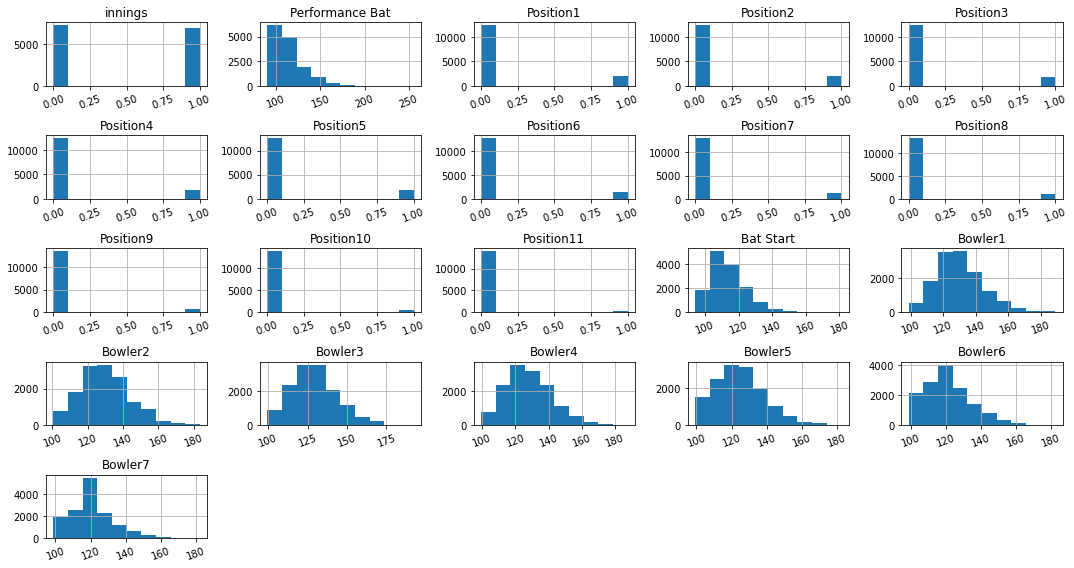

In [89]:
# plot the histogram of numeric variables
# the hist() function considers the numeric variables only, by default
# rotate the x-axis labels by 20 degree using the parameter, 'xrot'
df.hist(xrot = 20, )

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

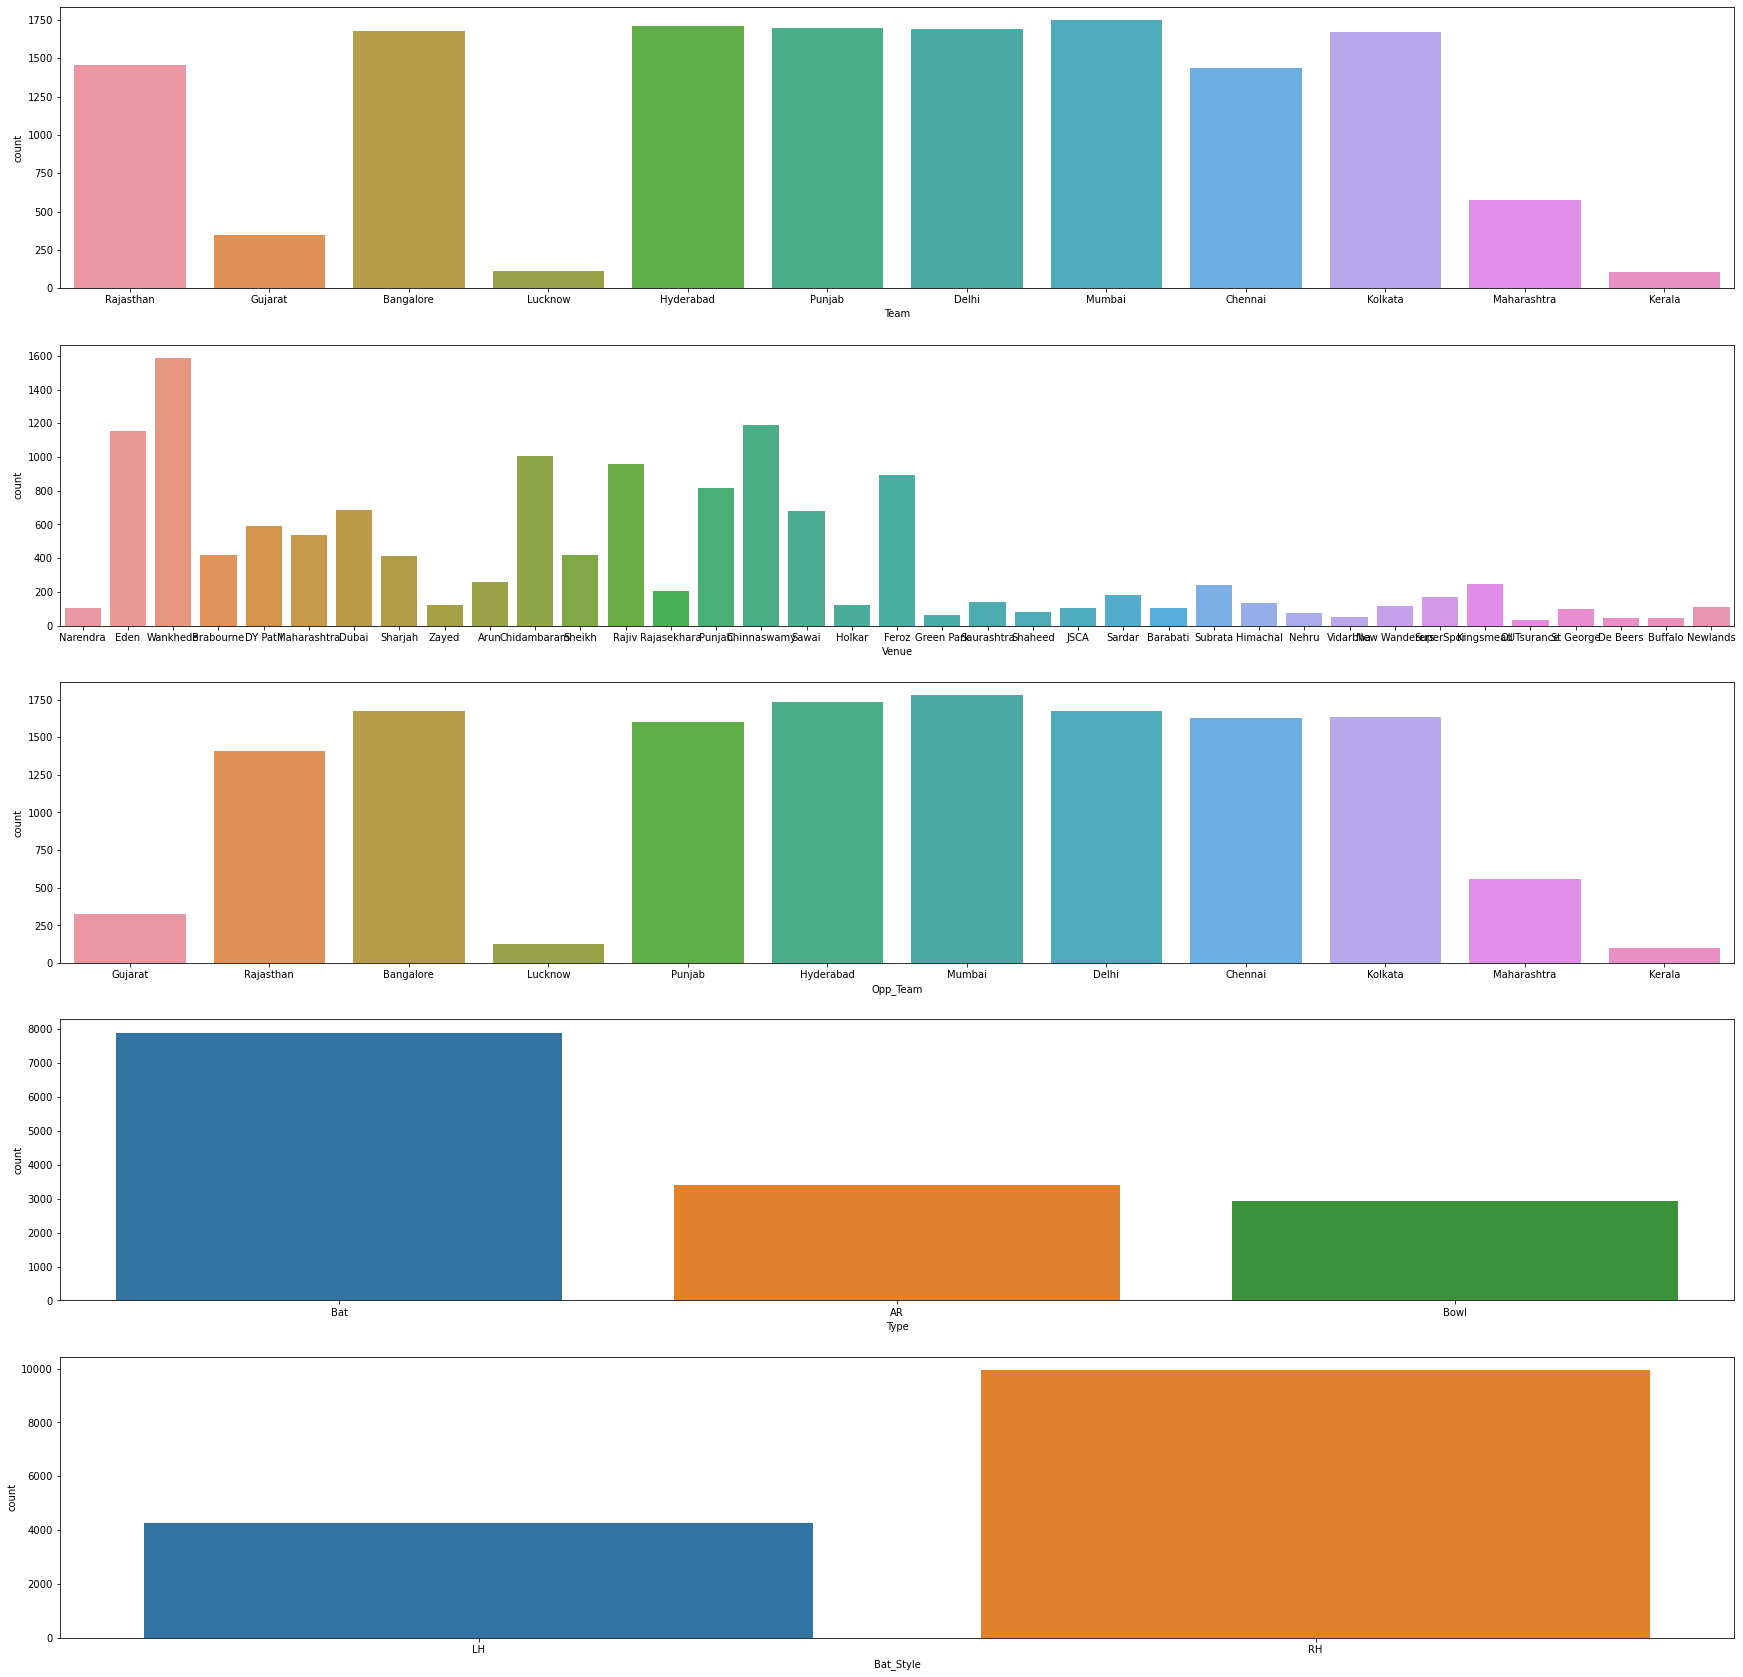

In [90]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:

    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(5,1, figsize = (30, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)
    
# display the plot
plt.show()

In [91]:
categorical

['Team', 'Venue', 'Opp_Team', 'Type', 'Bat_Style']

## 4.4 Handling Outliers

Here we can handle the oultier using IQR with max= Q3 + 3 * IQR. It will remove only extreme outliers.

**Handling Outliers with respect to Venue**

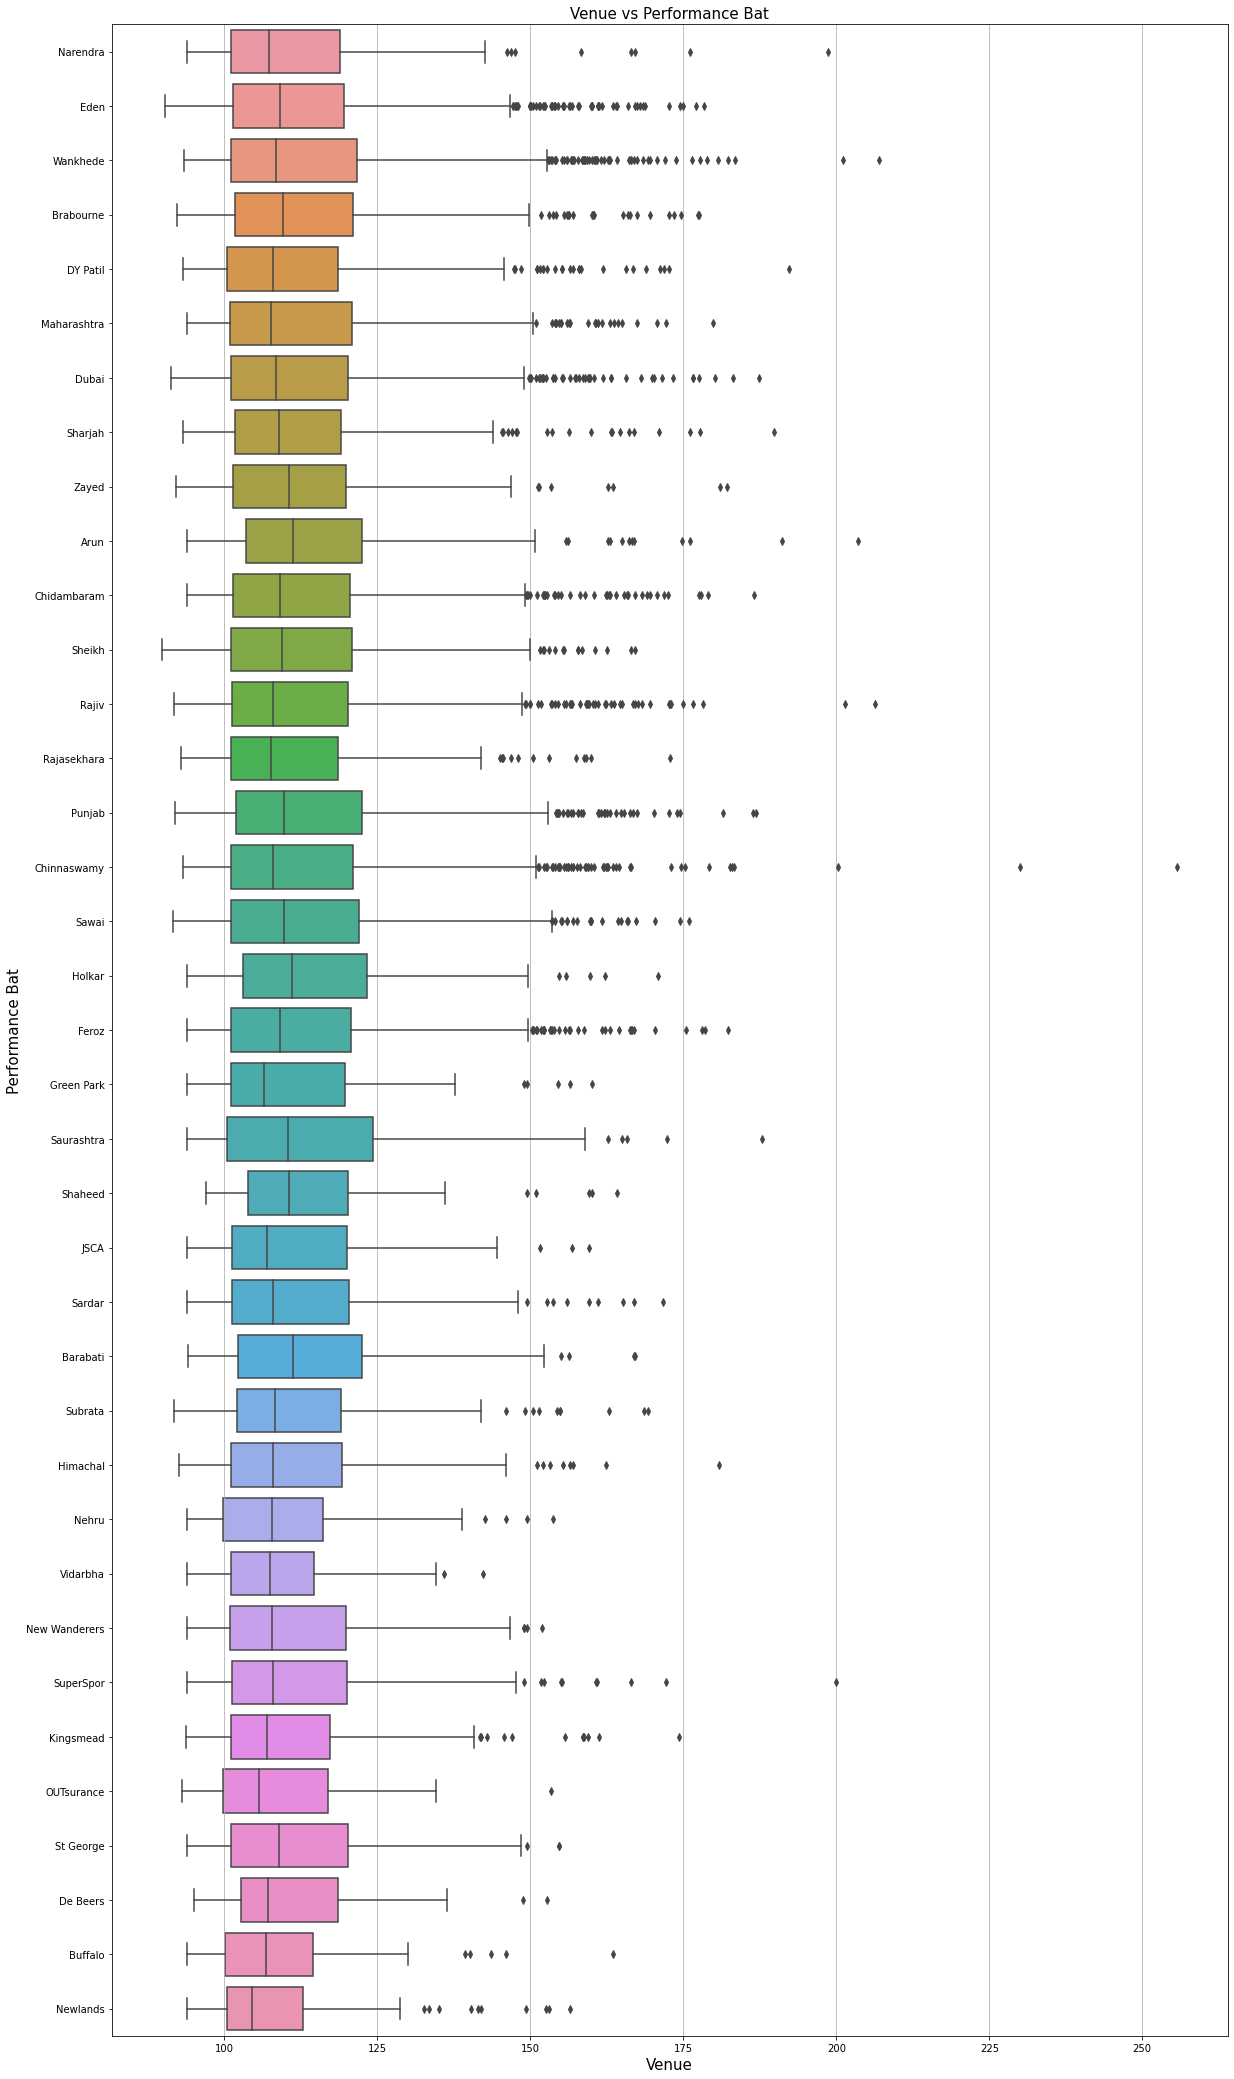

In [92]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
fig, ax = plt.subplots(figsize=(20, 37))
sns.boxplot(x="Performance Bat", y="Venue", data= df)

# set the title of the plot and the fontsize
plt.title("Venue vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Venue", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)
ax.xaxis.grid(True)

# display the plot
plt.show()

In [93]:
df.shape

(14229, 26)

In [94]:
df["Venue"].unique()

array(['Narendra', 'Eden', 'Wankhede', 'Brabourne', 'DY Patil',
       'Maharashtra', 'Dubai', 'Sharjah', 'Zayed', 'Arun', 'Chidambaram',
       'Sheikh', 'Rajiv', 'Rajasekhara', 'Punjab', 'Chinnaswamy', 'Sawai',
       'Holkar', 'Feroz', 'Green Park', 'Saurashtra', 'Shaheed', 'JSCA',
       'Sardar', 'Barabati', 'Subrata', 'Himachal', 'Nehru', 'Vidarbha',
       'New Wanderers', 'SuperSpor', 'Kingsmead', 'OUTsurance',
       'St George', 'De Beers', 'Buffalo', 'Newlands'], dtype=object)

In [95]:
for i in df["Venue"].unique():
    Q1,Q3 = df[df["Venue"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Venue'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [96]:
df=df.reset_index(drop=True)

In [97]:
df.shape

(14186, 26)

**Handling Outliers with respect to Type**

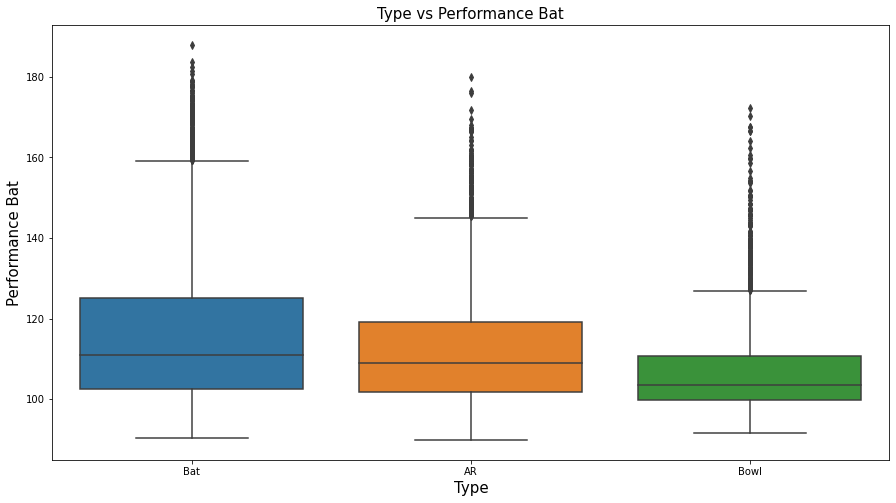

In [98]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Type", data= df)

# set the title of the plot and the fontsize
plt.title("Type vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Type", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [99]:
df.Type.unique()

array(['Bat', 'AR', 'Bowl'], dtype=object)

In [100]:
for i in df["Type"].unique():
    Q1,Q3 = df[df["Type"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Type'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [101]:
df=df.reset_index(drop=True)

In [102]:
df.shape

(14138, 26)

**Handling Outliers with respect to Bat Style**

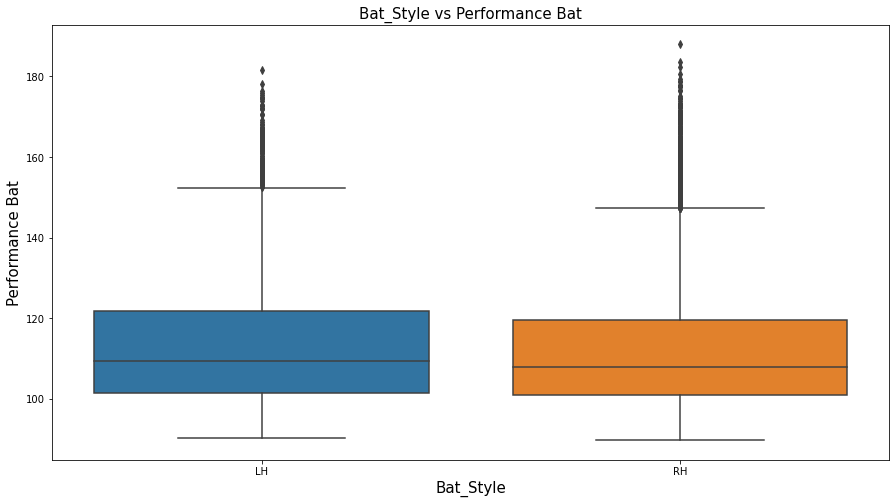

In [103]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Bat_Style", data= df)

# set the title of the plot and the fontsize
plt.title("Bat_Style vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Bat_Style", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [104]:
df.Bat_Style.unique()

array(['LH', 'RH'], dtype=object)

In [105]:
for i in df["Bat_Style"].unique():
    Q1,Q3 = df[df["Bat_Style"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Bat_Style'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    

In [106]:
df=df.reset_index(drop=True)

In [107]:
df.shape

(14123, 26)

**Handling Outliers with respect to Team**

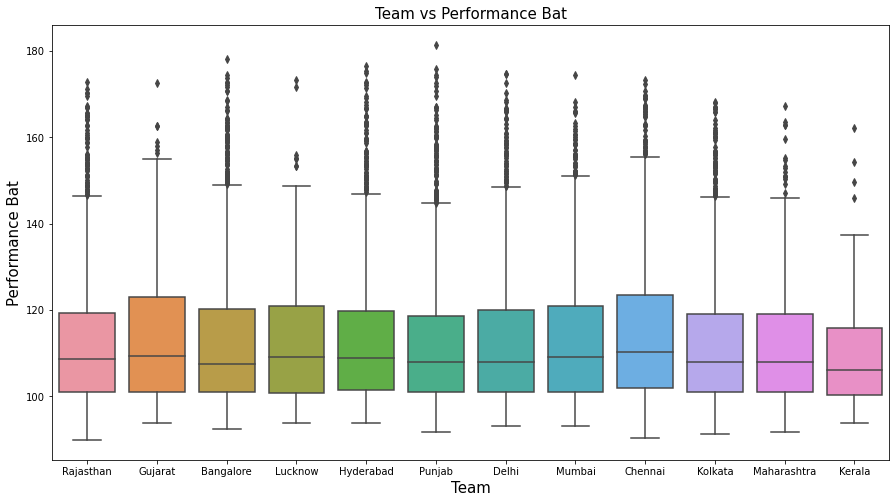

In [108]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Team", data= df)

# set the title of the plot and the fontsize
plt.title("Team vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Team", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [109]:
df.Team.unique()

array(['Rajasthan', 'Gujarat', 'Bangalore', 'Lucknow', 'Hyderabad',
       'Punjab', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Maharashtra',
       'Kerala'], dtype=object)

In [110]:
for i in df["Team"].unique():
    Q1,Q3 = df[df["Team"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Team'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    


In [111]:
df=df.reset_index(drop=True)

In [112]:
df.shape

(14112, 26)

**Handling Outliers with respect to Opp Team**

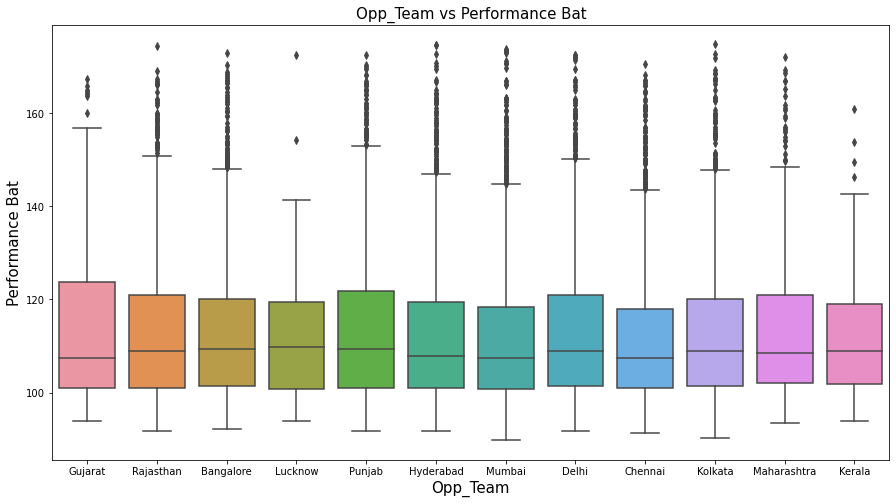

In [113]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Performance Bat", x="Opp_Team", data= df)

# set the title of the plot and the fontsize
plt.title("Opp_Team vs Performance Bat", fontsize=15)

# set the xlabel and the fontsize
plt.xlabel("Opp_Team", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Performance Bat", fontsize=15)

# display the plot
plt.show()

In [114]:
df.Opp_Team.unique()

array(['Gujarat', 'Rajasthan', 'Bangalore', 'Lucknow', 'Punjab',
       'Hyderabad', 'Mumbai', 'Delhi', 'Chennai', 'Kolkata',
       'Maharashtra', 'Kerala'], dtype=object)

In [115]:
for i in df["Opp_Team"].unique():
    Q1,Q3 = df[df["Opp_Team"]==str(i)]["Performance Bat"].quantile([0.25,0.75])  
    IQR = Q3 - Q1
    up_lim = Q3 + 3 * IQR 
    index = df[ (df['Opp_Team'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
    df.drop(index , inplace=True)
    


In [116]:
df=df.reset_index(drop=True)

In [117]:
df.shape

(14106, 26)

In [118]:
Q1,Q3 = df["Performance Bat"].quantile([0.25,0.75])  
IQR = Q3 - Q1
up_lim = Q3 + 3 * IQR 
index = df[ (df['Opp_Team'] == str(i)) & (df["Performance Bat"] > up_lim) ].index
df.drop(index , inplace=True)

In [119]:
df=df.reset_index(drop=True)

In [120]:
df.shape

(14106, 26)

## 4.5 Study Correlation

In [121]:
df.columns

Index(['innings', 'Team', 'Performance Bat', 'Venue', 'Position1', 'Position2',
       'Position3', 'Position4', 'Position5', 'Position6', 'Position7',
       'Position8', 'Position9', 'Position10', 'Position11', 'Opp_Team',
       'Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7', 'Type', 'Bat_Style'],
      dtype='object')

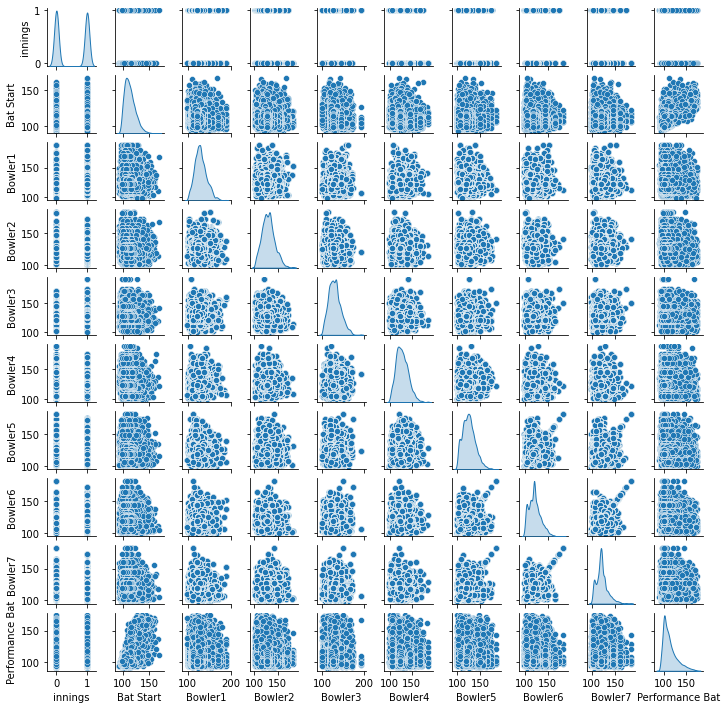

In [122]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Venue", "innings", "Bat Start", "Type", "Bat_Style", "Team","Opp_Team","Bowler1","Bowler2",
         "Bowler3","Bowler4","Bowler5","Bowler6","Bowler7","Performance Bat"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df[columns], size=1, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

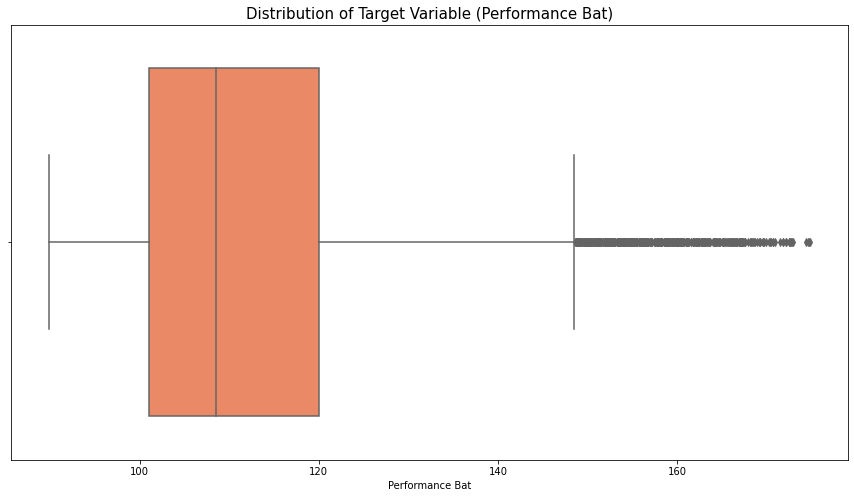

In [123]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df['Performance Bat'], color='coral')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Performance Bat)', fontsize = 15)

# display the plot
plt.show()

In [124]:
df["Performance Bat"].max()

174.75000000000003

In [125]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_data['Type'] = df[missing_data.index].dtypes
missing_data

Total  Percentage of Missing Values     Type
innings              0                           0.0    int64
Team                 0                           0.0   object
Type                 0                           0.0   object
Bowler7              0                           0.0  float64
Bowler6              0                           0.0  float64
Bowler5              0                           0.0  float64
Bowler4              0                           0.0  float64
Bowler3              0                           0.0  float64
Bowler2              0                           0.0  float64
Bowler1              0                           0.0  float64
Bat Start            0                           0.0  float64
Opp_Team             0                           0.0   object
Position11           0                           0.0    int32
Position10           0                           0.0    int32
Position9            0                           0.0    int32
Position8            0                           0.0    int32
Position7            0                           0.0    int32
Position6            0                           0.0    int32
Position5            0                           0.0    int32
Position4            0                           0.0    int32
Position3            0                           0.0    int32
Position2            0                           0.0    int32
Position1            0                           0.0    int32
Venue                0                           0.0   object
Performance Bat      0                           0.0  float64
Bat_Style            0                           0.0   object

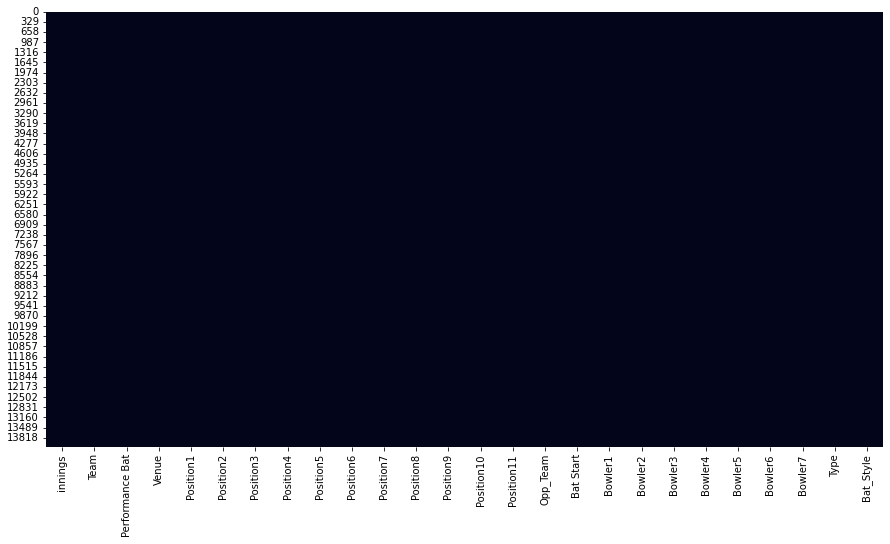

In [126]:
# plot heatmap to visualize the null values in each column
# 'cbar = False' does not show the color axis 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

In [127]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df.corr()

# print the correlation matrix
corrmat

innings  Performance Bat  Position1  Position2  Position3  \
innings          1.000000        -0.028205   0.010001   0.007695   0.004513   
Performance Bat -0.028205         1.000000   0.075043   0.081595   0.072125   
Position1        0.010001         0.075043   1.000000  -0.152122  -0.151415   
Position2        0.007695         0.081595  -0.152122   1.000000  -0.151368   
Position3        0.004513         0.072125  -0.151415  -0.151368   1.000000   
Position4       -0.003863         0.080548  -0.149570  -0.149524  -0.148829   
Position5       -0.014758         0.046858  -0.144884  -0.144839  -0.144166   
Position6       -0.020036        -0.023223  -0.135163  -0.135121  -0.134493   
Position7       -0.016724        -0.067938  -0.120351  -0.120314  -0.119755   
Position8       -0.008086        -0.115991  -0.104291  -0.104259  -0.103774   
Position9        0.012275        -0.133890  -0.086768  -0.086741  -0.086338   
Position10       0.023270        -0.127444  -0.069418  -0.069397  -0.069075   
Position11       0.038018        -0.108099  -0.051212  -0.051196  -0.050958   
Bat Start       -0.020277         0.615623   0.142059   0.121904   0.114284   
Bowler1         -0.029282        -0.066050  -0.024099  -0.022346  -0.023504   
Bowler2          0.025137        -0.067252  -0.020472  -0.021538  -0.019978   
Bowler3          0.001562        -0.064101  -0.019374  -0.020812  -0.018816   
Bowler4          0.061522        -0.056960  -0.018917  -0.021219  -0.016066   
Bowler5         -0.017904        -0.071248  -0.023339  -0.023816  -0.024524   
Bowler6          0.024996        -0.058474  -0.015538  -0.015459  -0.017029   
Bowler7          0.010468        -0.044074  -0.010596  -0.010622  -0.010011   

                 Position4  Position5  Position6  Position7  Position8  \
innings          -0.003863  -0.014758  -0.020036  -0.016724  -0.008086   
Performance Bat   0.080548   0.046858  -0.023223  -0.067938  -0.115991   
Position1        -0.149570  -0.144884  -0.135163  -0.120351  -0.104291   
Position2        -0.149524  -0.144839  -0.135121  -0.120314  -0.104259   
Position3        -0.148829  -0.144166  -0.134493  -0.119755  -0.103774   
Position4         1.000000  -0.142410  -0.132854  -0.118296  -0.102510   
Position5        -0.142410   1.000000  -0.128692  -0.114589  -0.099298   
Position6        -0.132854  -0.128692   1.000000  -0.106901  -0.092636   
Position7        -0.118296  -0.114589  -0.106901   1.000000  -0.082484   
Position8        -0.102510  -0.099298  -0.092636  -0.082484   1.000000   
Position9        -0.085286  -0.082614  -0.077071  -0.068625  -0.059467   
Position10       -0.068233  -0.066095  -0.061660  -0.054903  -0.047577   
Position11       -0.050337  -0.048760  -0.045489  -0.040504  -0.035099   
Bat Start         0.134270   0.048780  -0.040730  -0.101454  -0.182799   
Bowler1          -0.017678  -0.008330   0.005018   0.016818   0.030578   
Bowler2          -0.015904  -0.008709   0.003930   0.018597   0.029830   
Bowler3          -0.013181  -0.006240  -0.001284   0.019961   0.022134   
Bowler4          -0.013713  -0.009509   0.002740   0.017346   0.024427   
Bowler5          -0.016721  -0.009691   0.005077   0.019367   0.032319   
Bowler6          -0.012181  -0.005887   0.002712   0.007706   0.021375   
Bowler7          -0.008454  -0.000340   0.004615   0.008789   0.008401   

                 Position9  Position10  Position11  Bat Start   Bowler1  \
innings           0.012275    0.023270    0.038018  -0.020277 -0.029282   
Performance Bat  -0.133890   -0.127444   -0.108099   0.615623 -0.066050   
Position1        -0.086768   -0.069418   -0.051212   0.142059 -0.024099   
Position2        -0.086741   -0.069397   -0.051196   0.121904 -0.022346   
Position3        -0.086338   -0.069075   -0.050958   0.114284 -0.023504   
Position4        -0.085286   -0.068233   -0.050337   0.134270 -0.017678   
Position5        -0.082614   -0.066095   -0.048760   0.048780 -0.008330   
Position6        -0.077071   -0.061660   -0.045489

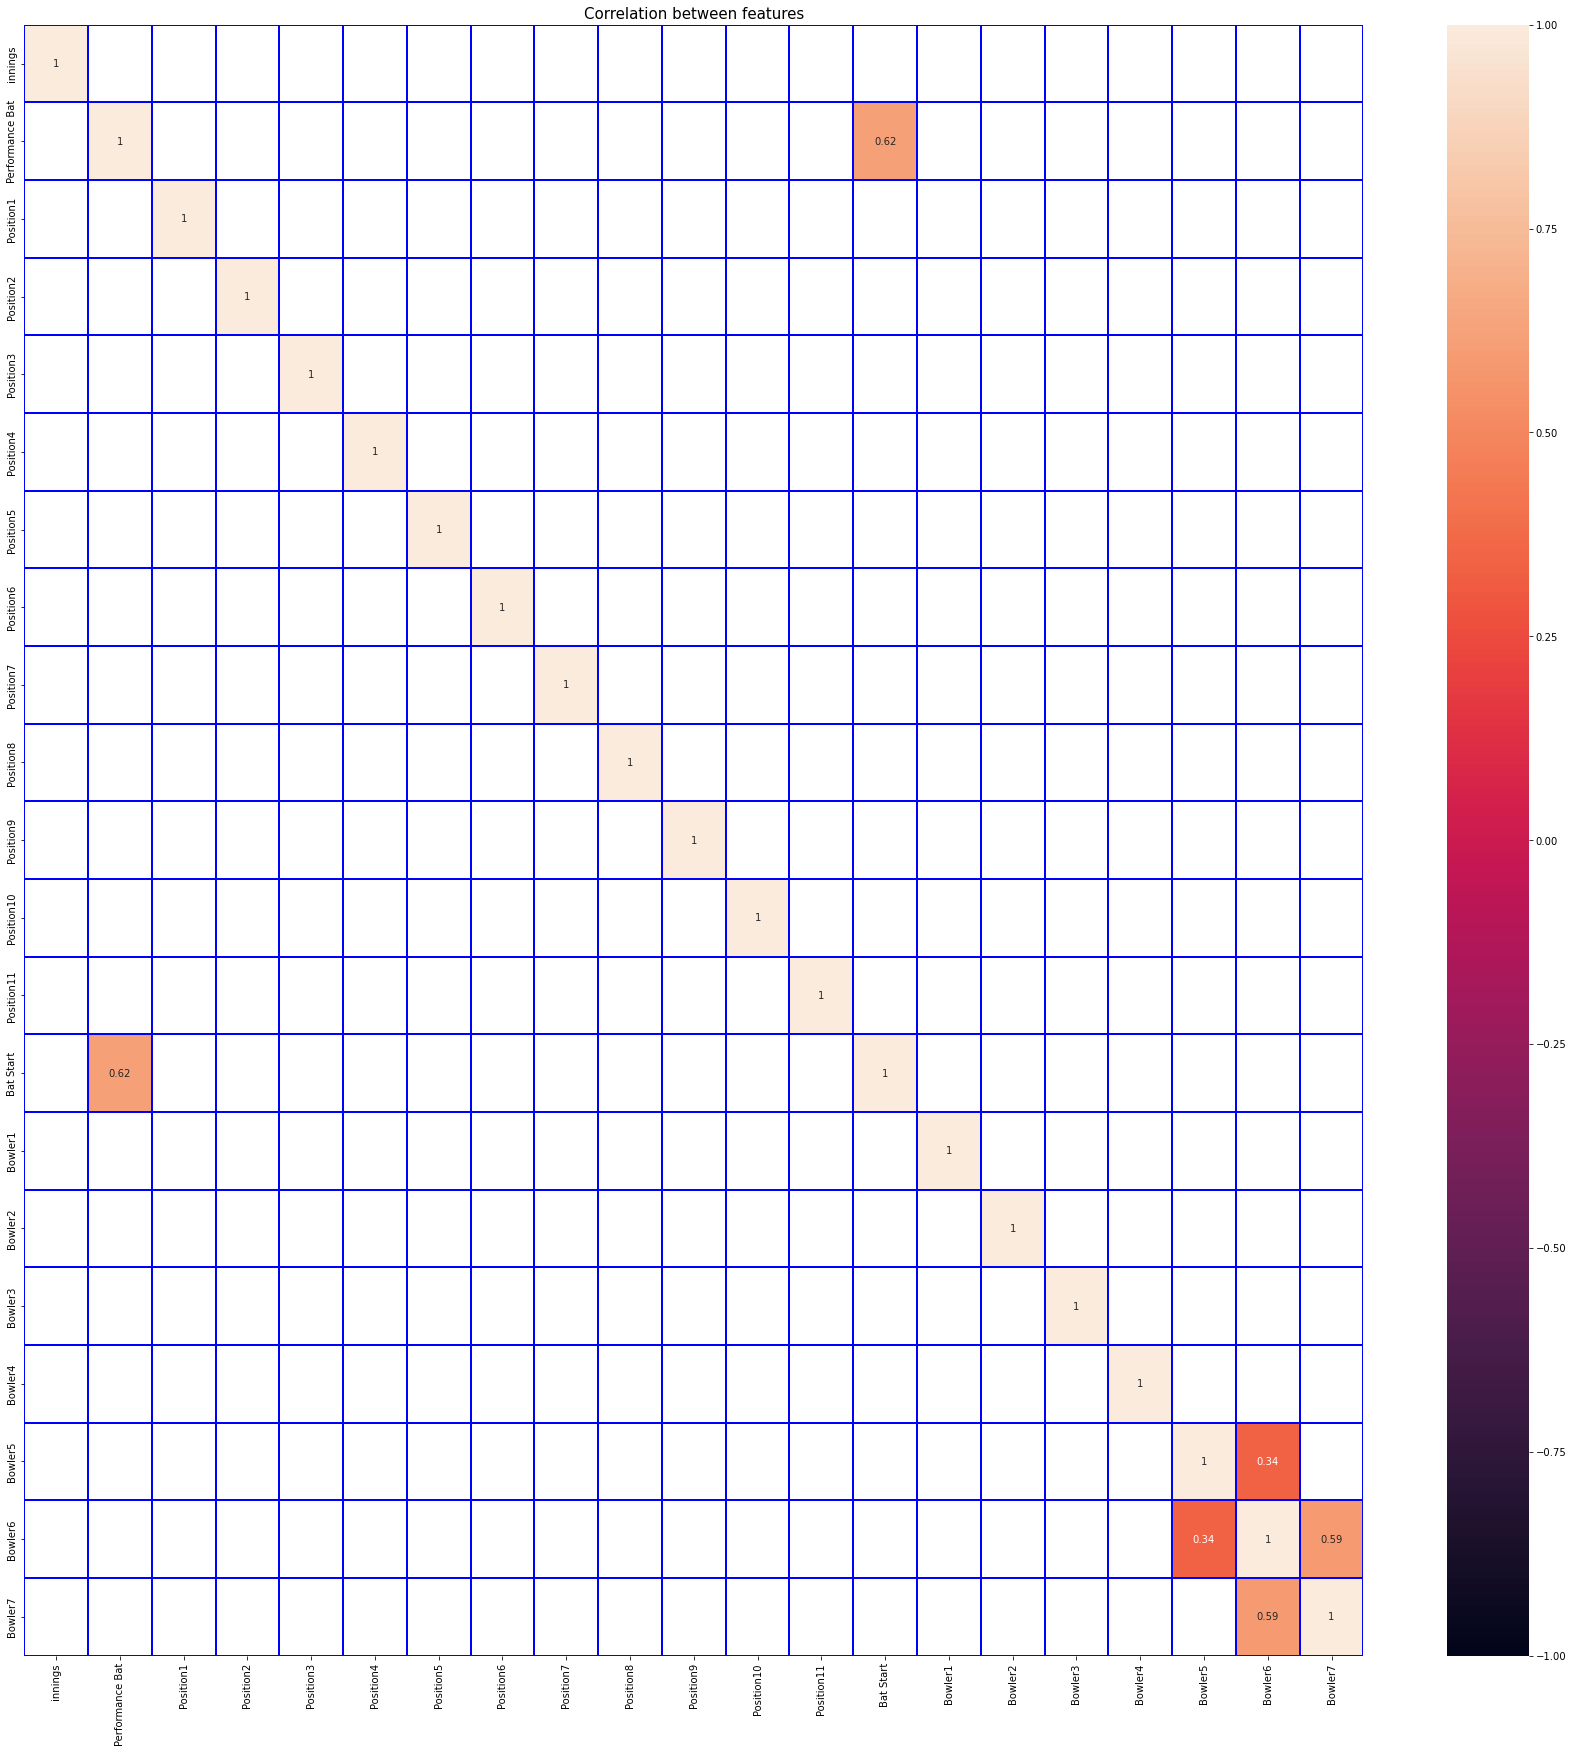

In [128]:
correlation=df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation[(correlation >= 0.3) | (correlation <= -0.3)],
            annot=True,linewidths=.1,linecolor="blue",vmax = 1, vmin = -1)
plt.title('Correlation between features', fontsize=15)
plt.show()

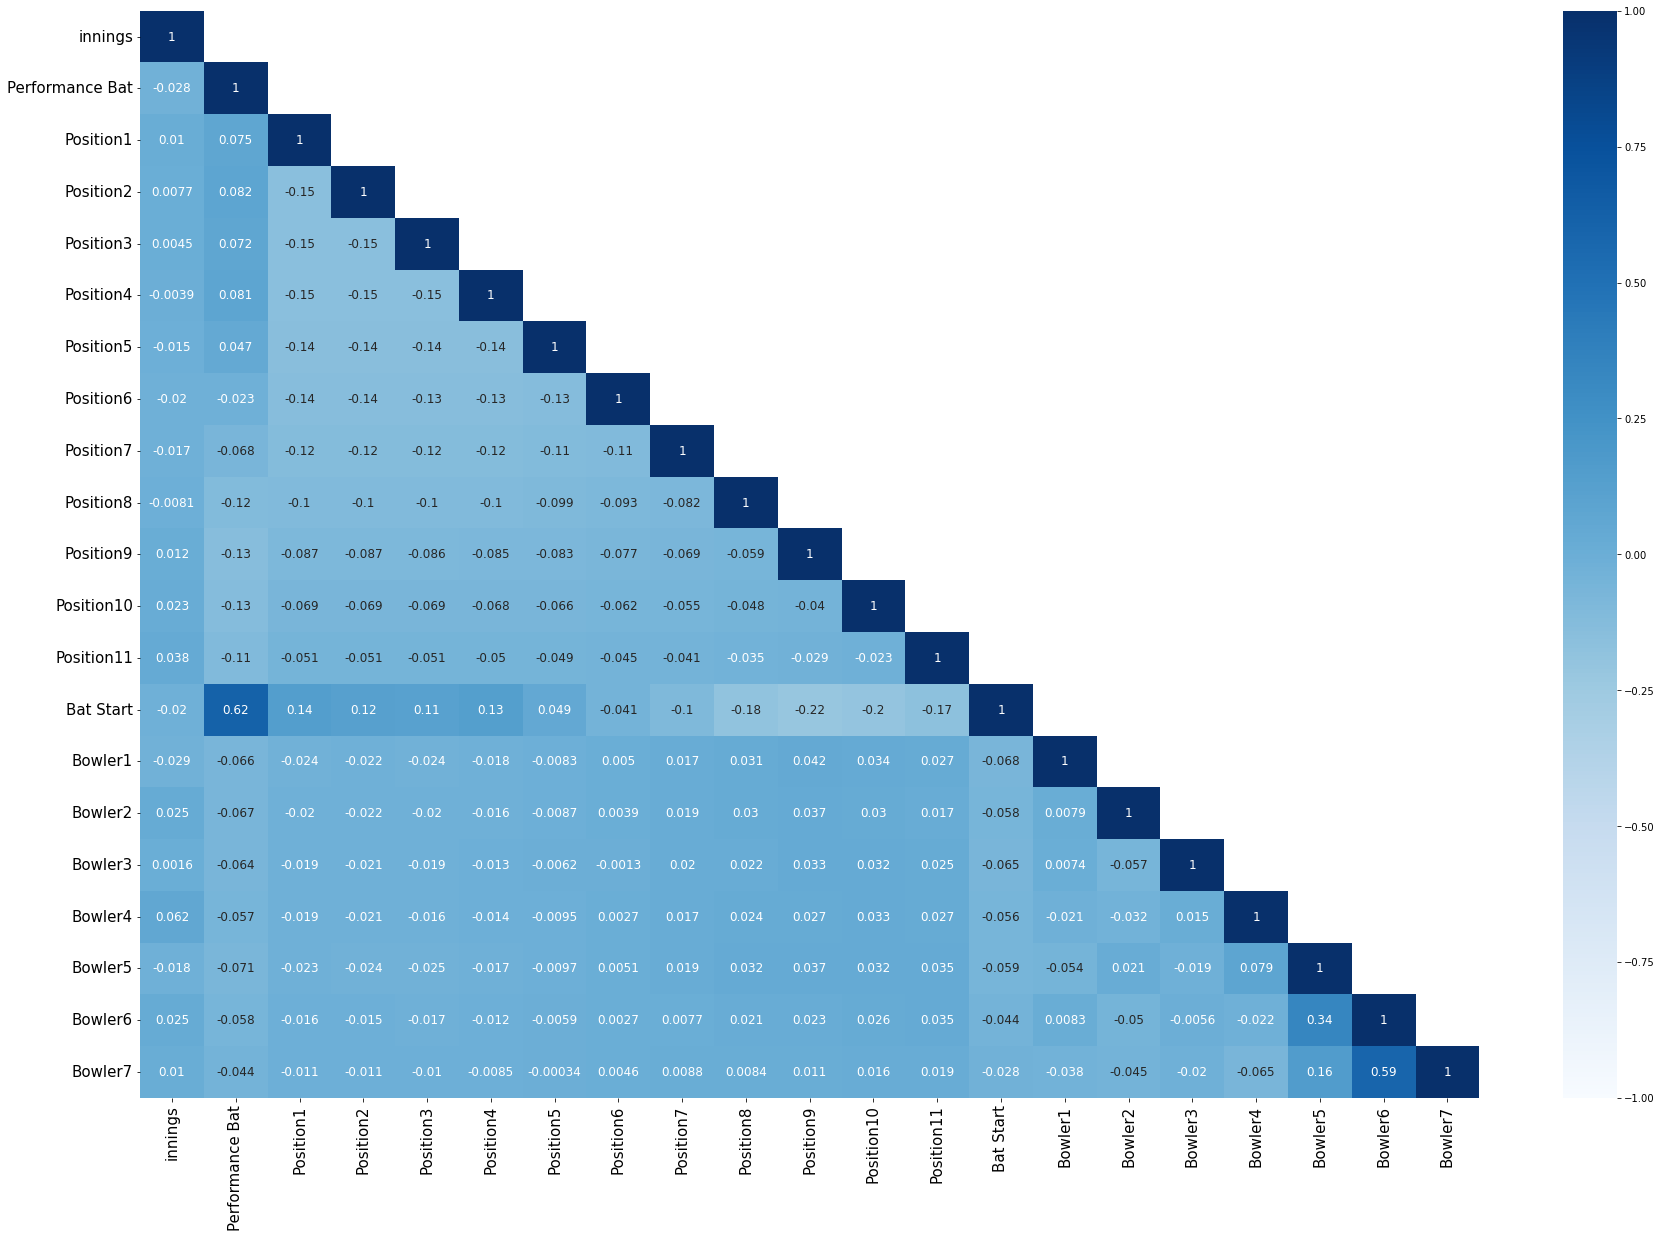

In [129]:
# set the plot size
# pass the required height and width to the parameter, 'figsize'  
plt.figure(figsize = (30,20))

# use 'mask' to plot a upper triangular correlation matrix 
# 'tril_indices_from' returns the indices for the lower-triangle of matrix
# 'k = -1' consider the diagonal of the matrix
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask, k = 1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corrmat, cmap = 'Blues', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

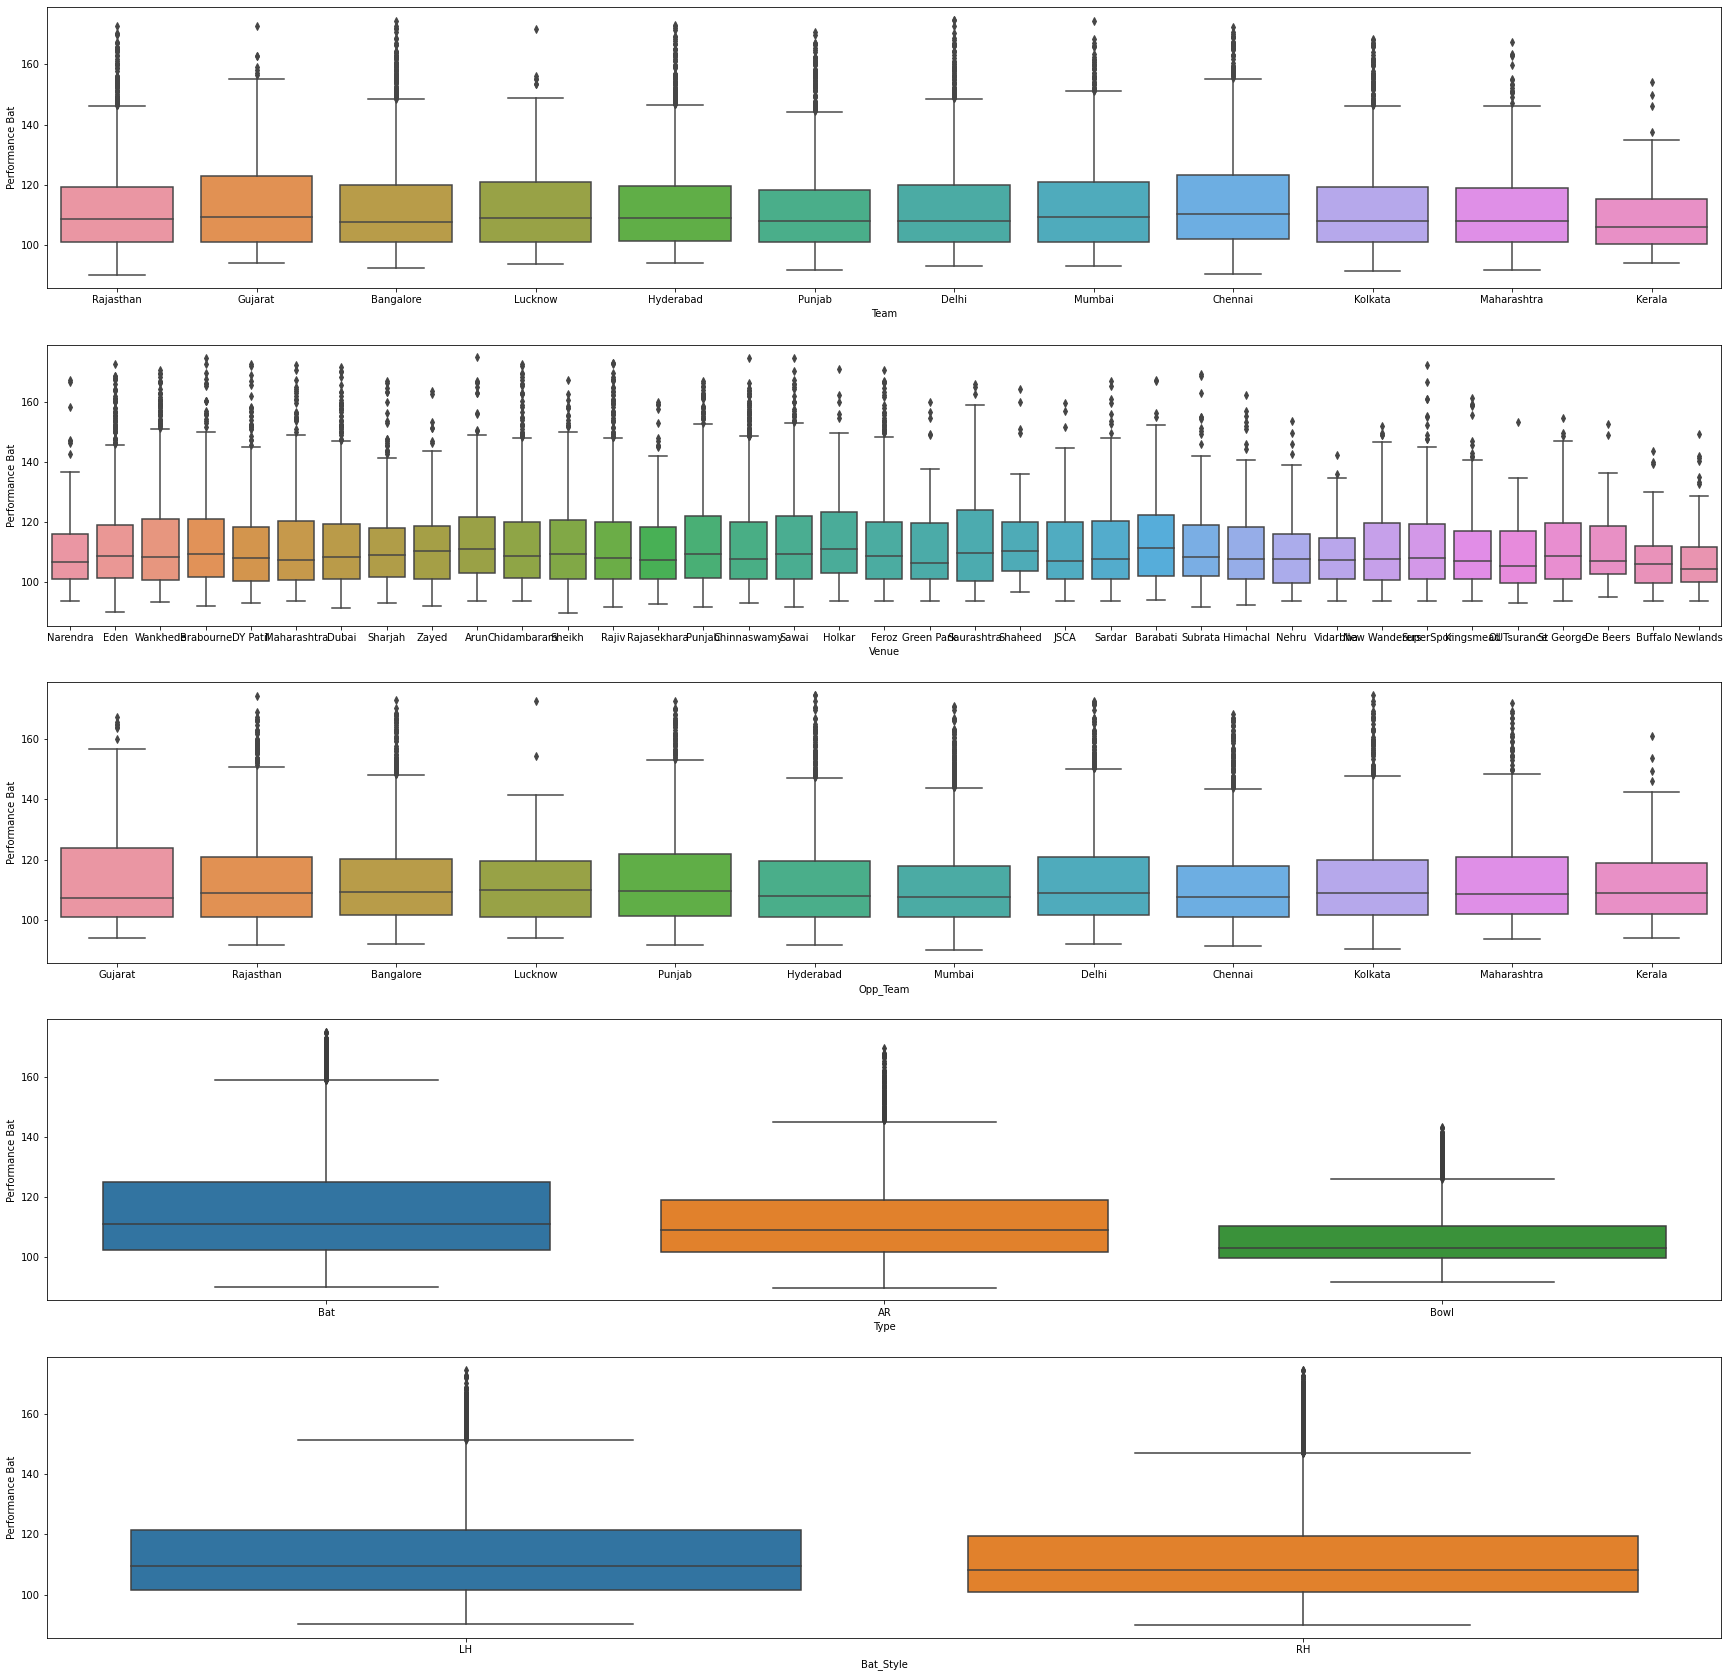

In [130]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the boxplot for each categorical and target variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (30, 30))

# use for loop to plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(x = variable, y = 'Performance Bat', data = df, ax = subplot)
    
# display the plot
plt.show()

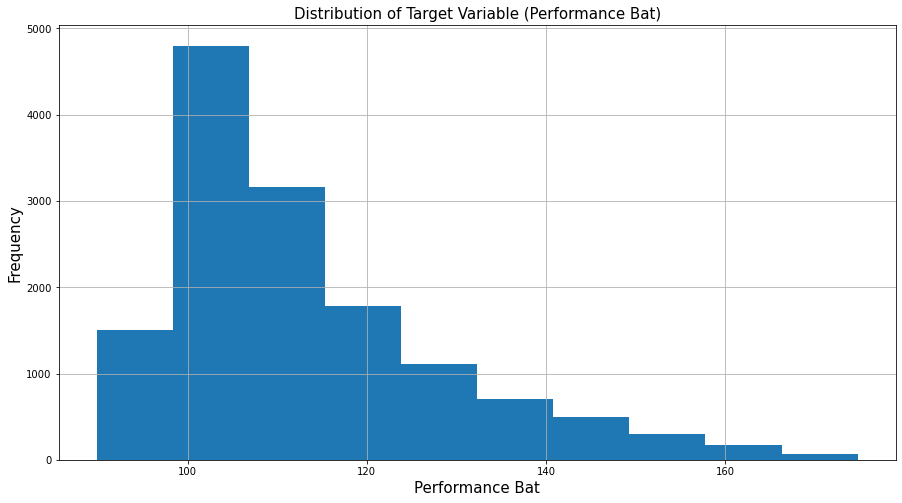

In [131]:
# check the distribution of target variable
df["Performance Bat"].hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Performance Bat)', fontsize = 15)
plt.xlabel('Performance Bat', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [132]:
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(df["Performance Bat"])

# to print the numeric outputs of the jarque_bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=4816.012, p-value=0.000
The data is not normally distributed (reject H0)


In [133]:
# log transformation for normality using np.log()
df['log Performance Bat'] = np.log(df['Performance Bat'])

# display first 5 rows of the data
df.head()

innings       Team  Performance Bat     Venue  Position1  Position2  \
0        0  Rajasthan       111.420000  Narendra          1          0   
1        0  Rajasthan       129.416667  Narendra          0          1   
2        0  Rajasthan       103.139368  Narendra          0          0   
3        0  Rajasthan        96.000000  Narendra          0          0   
4        0  Rajasthan       111.960000  Narendra          0          0   

   Position3  Position4  Position5  Position6  Position7  Position8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Position9  Position10  Position11 Opp_Team   Bat Start     Bowler1  \
0          0           0           0  Gujarat  108.726420  124.492358   
1          0           0           0  Gujarat  156.542271  124.492358   
2          0           0           0  Gujarat  115.963123  124.492358   
3          0           0           0  Gujarat  109.833333  124.492358   
4          0           0           0  Gujarat  105.460000  124.492358   

      Bowler2     Bowler3     Bowler4    Bowler5    Bowler6    Bowler7 Type  \
0  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
1  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
2  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
3  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   
4  127.596681  121.647523  120.721032  137.03254  136.82328  136.82328  Bat   

  Bat_Style  log Performance Bat  
0        LH             4.713307  
1        RH             4.863037  
2        RH             4.636081  
3        LH             4.564348  
4        LH             4.718142

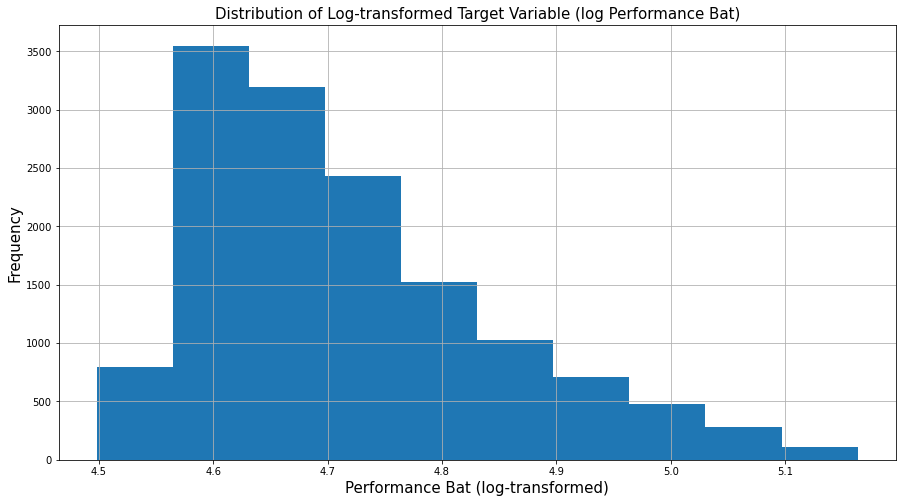

In [134]:
# recheck for normality 
# plot the histogram using hist
df["log Performance Bat"].hist()

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log Performance Bat)', fontsize = 15)
plt.xlabel('Performance Bat (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [135]:
# check the normality by jarque_bera test
# the test returns the the test statistics and the p-value of the test
stat, pv = jarque_bera(df['log Performance Bat'])

# to print the numeric outputs of the jarque_bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, pv))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if pv > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=2372.210, p-value=0.000
The data is not normally distributed (reject H0)


## 4.6 Feature Scaling

Here we can do the following:

1.One-Hot Encoding

2.Normalization using minmaxscaler()

In [136]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df[['Bat Start','Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6','Bowler7']]
df_target=df[['Performance Bat','log Performance Bat']]
df_nominal_features=df[['innings','Position1','Position2', 'Position3', 'Position4', 'Position5', 'Position6',
       'Position7', 'Position8', 'Position9', 'Position10', 'Position11',]]

# display the numeric features
print(df_numeric_features.columns)
df_nominal_features.columns

Index(['Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7'],
      dtype='object')


Index(['innings', 'Position1', 'Position2', 'Position3', 'Position4',
       'Position5', 'Position6', 'Position7', 'Position8', 'Position9',
       'Position10', 'Position11'],
      dtype='object')

In [137]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Team', 'Venue', 'Opp_Team', 'Type', 'Bat_Style'], dtype='object')

### 4.6.1 One Hot Encoding

In [138]:
df_Encode = OneHotEncoder(df_categoric_features.columns
                           ,use_cat_names=True)
hot = df_Encode.fit_transform(df_categoric_features)

In [139]:
hot.columns

Index(['Team_Rajasthan', 'Team_Gujarat', 'Team_Bangalore', 'Team_Lucknow',
       'Team_Hyderabad', 'Team_Punjab', 'Team_Delhi', 'Team_Mumbai',
       'Team_Chennai', 'Team_Kolkata', 'Team_Maharashtra', 'Team_Kerala',
       'Venue_Narendra', 'Venue_Eden', 'Venue_Wankhede', 'Venue_Brabourne',
       'Venue_DY Patil', 'Venue_Maharashtra', 'Venue_Dubai', 'Venue_Sharjah',
       'Venue_Zayed', 'Venue_Arun', 'Venue_Chidambaram', 'Venue_Sheikh',
       'Venue_Rajiv', 'Venue_Rajasekhara', 'Venue_Punjab', 'Venue_Chinnaswamy',
       'Venue_Sawai', 'Venue_Holkar', 'Venue_Feroz', 'Venue_Green Park',
       'Venue_Saurashtra', 'Venue_Shaheed', 'Venue_JSCA', 'Venue_Sardar',
       'Venue_Barabati', 'Venue_Subrata', 'Venue_Himachal', 'Venue_Nehru',
       'Venue_Vidarbha', 'Venue_New Wanderers', 'Venue_SuperSpor',
       'Venue_Kingsmead', 'Venue_OUTsurance', 'Venue_St George',
       'Venue_De Beers', 'Venue_Buffalo', 'Venue_Newlands', 'Opp_Team_Gujarat',
       'Opp_Team_Rajasthan', 'Opp_Team_Ba

In [140]:
df_One_hot=hot.drop(['Venue_Chinnaswamy','Type_AR','Bat_Style_RH','Team_Kolkata','Opp_Team_Bangalore'],axis=1)

In [141]:
df_One_hot.columns

Index(['Team_Rajasthan', 'Team_Gujarat', 'Team_Bangalore', 'Team_Lucknow',
       'Team_Hyderabad', 'Team_Punjab', 'Team_Delhi', 'Team_Mumbai',
       'Team_Chennai', 'Team_Maharashtra', 'Team_Kerala', 'Venue_Narendra',
       'Venue_Eden', 'Venue_Wankhede', 'Venue_Brabourne', 'Venue_DY Patil',
       'Venue_Maharashtra', 'Venue_Dubai', 'Venue_Sharjah', 'Venue_Zayed',
       'Venue_Arun', 'Venue_Chidambaram', 'Venue_Sheikh', 'Venue_Rajiv',
       'Venue_Rajasekhara', 'Venue_Punjab', 'Venue_Sawai', 'Venue_Holkar',
       'Venue_Feroz', 'Venue_Green Park', 'Venue_Saurashtra', 'Venue_Shaheed',
       'Venue_JSCA', 'Venue_Sardar', 'Venue_Barabati', 'Venue_Subrata',
       'Venue_Himachal', 'Venue_Nehru', 'Venue_Vidarbha',
       'Venue_New Wanderers', 'Venue_SuperSpor', 'Venue_Kingsmead',
       'Venue_OUTsurance', 'Venue_St George', 'Venue_De Beers',
       'Venue_Buffalo', 'Venue_Newlands', 'Opp_Team_Gujarat',
       'Opp_Team_Rajasthan', 'Opp_Team_Lucknow', 'Opp_Team_Punjab',
       'Op

### 4.6.2 Normalization

In [142]:
df_numeric_features.columns

Index(['Bat Start', 'Bowler1', 'Bowler2', 'Bowler3', 'Bowler4', 'Bowler5',
       'Bowler6', 'Bowler7'],
      dtype='object')

In [143]:
minmax_scale = MinMaxScaler()
# fit on the train dataset
minmax_scale.fit((df_numeric_features))
# transform the train dataset columns ("Experience" and "Salary")
df_minmax = minmax_scale.transform(df_numeric_features)
print(type(df_minmax))
df_minmax_new = pd.DataFrame(df_minmax,columns=['Bat Start', 'Bowler1', 'Bowler2',
       'Bowler3', 'Bowler4', 'Bowler5', 'Bowler6', 'Bowler7'])
df_minmax_new

<class 'numpy.ndarray'>


Bat Start   Bowler1   Bowler2   Bowler3   Bowler4   Bowler5   Bowler6  \
0       0.200434  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
1       0.847717  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
2       0.298398  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
3       0.215419  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
4       0.156217  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
5       0.274941  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
6       0.192857  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
7       0.198904  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
8       0.163527  0.285501  0.326528  0.239687  0.242693  0.455000  0.453425   
9       0.135152  0.190525  0.397049  0.410488  0.298491  0.212361  0.213710   
10      0.323506  0.190525  0.397049  0.410488  0.298491  0.212361  0.213710   
11      0.234929  0.190525  0.397049  0.410488  0.298491  0.212361  0.213710   
12      0.571517  0.190525  0.397049  0.410488  0.298491  0.212361  0.213710   
13      0.584678  0.190525  0.397049  0.410488  0.298491  0.212361  0.213710   
14      0.263550  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
15      0.329614  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
16      0.699757  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
17      0.261670  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
18      0.159797  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
19      0.289872  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
20      0.156243  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
21      0.059163  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
22      0.094934  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
23      0.075536  0.603183  0.235524  0.238597  0.274318  0.370607  0.259321   
24      0.312476  0.051806  0.529049  0.241747  0.328845  0.074053  0.292374   
25      0.309049  0.051806  0.529049  0.241747  0.328845  0.074053  0.292374   
26      0.228956  0.051806  0.529049  0.241747  0.328845  0.074053  0.292374   
27      0.109990  0.051806  0.529049  0.241747  0.328845  0.074053  0.292374   
28      0.277378  0.387765  0.294764  0.209252  0.073506  0.216287  0.313966   
29      0.277173  0.387765  0.294764  0.209252  0.073506  0.216287  0.313966   
30      0.374854  0.387765  0.294764  0.209252  0.073506  0.216287  0.313966   
31      0.271853  0.387765  0.294764  0.209252  0.073506  0.216287  0.313966   
32      0.310178  0.387765  0.294764  0.209252  0.073506  0.216287  0.313966   
33      0.503862  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
34      0.569637  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
35      0.229081  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
36      0.506371  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
37      0.253412  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
38      0.048462  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
39      0.140004  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
40      0.061742  0.094138  0.371016  0.371244  0.553888  0.178438  0.246312   
41      0.371485  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
42      0.343506  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
43      0.278967  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
44      0.230648  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
45      0.207005  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
46      0.208650  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
47      0.310629  0.214329  0.292806  0.110570  0.240306  0.443106  0.203675   
48      0.327866  0.467114  0.191709  0.329659  0.282847  0.424188  0.259321   
49     

In [144]:
df = pd.concat([df_minmax_new,df_One_hot,df_nominal_features,df_target], axis=1)

In [145]:
df.head()

Bat Start   Bowler1   Bowler2   Bowler3   Bowler4  Bowler5   Bowler6  \
0   0.200434  0.285501  0.326528  0.239687  0.242693    0.455  0.453425   
1   0.847717  0.285501  0.326528  0.239687  0.242693    0.455  0.453425   
2   0.298398  0.285501  0.326528  0.239687  0.242693    0.455  0.453425   
3   0.215419  0.285501  0.326528  0.239687  0.242693    0.455  0.453425   
4   0.156217  0.285501  0.326528  0.239687  0.242693    0.455  0.453425   

    Bowler7  Team_Rajasthan  Team_Gujarat  Team_Bangalore  Team_Lucknow  \
0  0.454732               1             0               0             0   
1  0.454732               1             0               0             0   
2  0.454732               1             0               0             0   
3  0.454732               1             0               0             0   
4  0.454732               1             0               0             0   

   Team_Hyderabad  Team_Punjab  Team_Delhi  Team_Mumbai  Team_Chennai  \
0               0            0           0            0             0   
1               0            0           0            0             0   
2               0            0           0            0             0   
3               0            0           0            0             0   
4               0            0           0            0             0   

   Team_Maharashtra  Team_Kerala  Venue_Narendra  Venue_Eden  Venue_Wankhede  \
0                 0            0               1           0               0   
1                 0            0               1           0               0   
2                 0            0               1           0               0   
3                 0            0               1           0               0   
4                 0            0               1           0               0   

   Venue_Brabourne  Venue_DY Patil  Venue_Maharashtra  Venue_Dubai  \
0                0               0                  0            0   
1                0               0                  0            0   
2                0               0                  0            0   
3                0               0                  0            0   
4                0               0                  0            0   

   Venue_Sharjah  Venue_Zayed  Venue_Arun  Venue_Chidambaram  Venue_Sheikh  \
0              0            0           0                  0             0   
1              0            0           0                  0             0   
2              0            0           0                  0             0   
3              0            0           0                  0             0   
4              0            0           0                  0             0   

   Venue_Rajiv  Venue_Rajasekhara  Venue_Punjab  Venue_Sawai  Venue_Holkar  \
0            0                  0             0            0             0   
1            0                  0             0            0             0   
2            0                  0             0            0             0   
3            0                  0             0            0             0   
4            0                  0             0            0             0   

   Venue_Feroz  Venue_Green Park  Venue_Saurashtra  Venue_Shaheed  Venue_JSCA  \
0            0                 0                 0              0           0   
1            0                 0                 0              0           0   
2            0                 0                 0              0           0   
3            0                 0                 0              0           0   
4            0                 0                 0              0           0   

   Venue_Sardar  Venue_Barabati  Venue_Subrata  Venue_Himachal  Venue_Nehru  \
0             0               0              0               0            0   
1             0               0              0               0            0   
2             0               0              0               0            0   
3             0    

## 5. Random Forest

## 5.1 Random Forest Model

In this section we build a model using random forest regressor.

In order to build the model, we do the following:

1. Split the features and target into seperate data frames
2. Split the data into training and test sets
3. Build model
4. Predict the values using test set
5. Compute accuracy measures
6. Tabulate the results

In [146]:
df_dummy=df.copy()
# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(["Performance Bat",'log Performance Bat'], axis = 1)

# extract the target variable from the data set
y = df_dummy[['log Performance Bat']]

# split data into train subset and test subset for predictor and target variables
# 'test_size' returns the proportion of data to be included in the test set
# set 'random_state' to generate the same dataset each time you run the code 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for v
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (9874, 81)
The shape of X_test is: (4232, 81)
The shape of y_train is: (9874, 1)
The shape of y_test is: (4232, 1)


In [147]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10, warm_start=True, oob_score=True)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=10, warm_start=True)

In [148]:
# predict the values on test dataset using predict()
y_pred = rf_reg.predict(X_test)

In [149]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

#Calculate MAPE
rf_reg_MAPE=metrics.mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_MAPE)

Mean Absolute Error (MAE): 0.08009036433285915
Mean Squared Error (MSE): 0.010723412096414777
Root Mean Squared Error (RMSE): 0.10355390913149912
Mean Absolute Percentage Error(MAPE): 0.01687219576107328


In [150]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE
# create a list of column names
cols = ['Model', 'MAE', 'MSE', 'RMSE','MAPE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE,
                     'MAPE':rf_reg_MAPE
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model      MAE       MSE      RMSE      MAPE
0  Random Forest   0.08009  0.010723  0.103554  0.016872

In [151]:
# predict the values on train dataset using predict()
y_pred_train = rf_reg.predict(X_train)

In [152]:
# Calculate MAE
rf_reg_MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error (MAE)train:', rf_reg_MAE_train)

# Calculate MSE
rf_reg_MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error (MSE)train:', rf_reg_MSE_train)

# Calculate RMSE
rf_reg_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error (RMSE)train:', rf_reg_RMSE_train)

#Calculate MAPE
rf_reg_MAPE_train=metrics.mean_absolute_percentage_error(y_train, y_pred_train)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_MAPE_train)

Mean Absolute Error (MAE)train: 0.03023580011458859
Mean Squared Error (MSE)train: 0.0015700136694505652
Root Mean Squared Error (RMSE)train: 0.039623398004847654
Mean Absolute Percentage Error(MAPE): 0.006362543549006395


In [153]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest train ",
                     'MAE':rf_reg_MAE_train,
                     'MSE': rf_reg_MSE_train,
                     'RMSE': rf_reg_RMSE_train,   
                     'MAPE': rf_reg_MAPE_train
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0        Random Forest    0.08009  0.010723  0.103554  0.016872
1  Random Forest train   0.030236   0.00157  0.039623  0.006363

## 5.2 Random Forest with GridSearchCV

Now we build a random forest using the GridSearchCV. We start with our original data set gradually proceeding with our analysis

To build a Random Forest using GridSearchCV, we do the following:
1. Use GridSearch to obtain the optimal values of hyperparameters
2. Build the model using the hyperparameters obtained in step 1
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

In [154]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 85, 100],
                     'min_samples_split': [15,20],
                     'max_depth': [8, 10],
                    }]

In [155]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

Best parameters for random forest regressor:  {'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 85} 



In [156]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

In [157]:
# predict the class labels using 'X_test'
y_pred_cv = dt_grid_model.predict(X_test)

In [158]:
# calculate MAE
rf_reg_CV_MAE = metrics.mean_absolute_error(y_test, y_pred_cv)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE)
                                         
# calculate MSE
rf_reg_CV_MSE = metrics.mean_squared_error(y_test, y_pred_cv)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE)
                                         
# calculate RMSE
rf_reg_CV_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cv))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE)

#Calculate MAPE
rf_reg_CV_MAPE=metrics.mean_absolute_percentage_error(y_test, y_pred_cv)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_CV_MAPE)

Mean Absolute Error (MAE): 0.07756469334154802
Mean Squared Error (MSE): 0.009936875453815108
Root Mean Squared Error (RMSE): 0.09968387760222366
Mean Absolute Percentage Error(MAPE): 0.016338369211418964


In [159]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest with CV ",
                     'MAE':rf_reg_CV_MAE,
                     'MSE': rf_reg_CV_MSE,
                     'RMSE': rf_reg_CV_RMSE,   
                     'MAPE': rf_reg_CV_MAPE
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0          Random Forest    0.08009  0.010723  0.103554  0.016872
1    Random Forest train   0.030236   0.00157  0.039623  0.006363
2  Random Forest with CV   0.077565  0.009937  0.099684  0.016338

In [160]:
# predict the values on train dataset using predict()
y_pred_train_cv = dt_grid_model.predict(X_train)

In [161]:
# calculate MAE
rf_reg_CV_MAE_train = metrics.mean_absolute_error(y_train, y_pred_train_cv)
print('Mean Absolute Error (MAE):', rf_reg_CV_MAE_train)
                                         
# calculate MSE
rf_reg_CV_MSE_train = metrics.mean_squared_error(y_train, y_pred_train_cv)
print('Mean Squared Error (MSE):', rf_reg_CV_MSE_train)
                                         
# calculate RMSE
rf_reg_CV_RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_cv))
print('Root Mean Squared Error (RMSE):', rf_reg_CV_RMSE_train)

#Calculate MAPE
rf_reg_CV_MAPE_train=metrics.mean_absolute_percentage_error(y_train, y_pred_train_cv)
print('Mean Absolute Percentage Error(MAPE):', rf_reg_CV_MAPE_train)

Mean Absolute Error (MAE): 0.0718802647989949
Mean Squared Error (MSE): 0.008532747667705377
Root Mean Squared Error (RMSE): 0.09237287300774713
Mean Absolute Percentage Error(MAPE): 0.015129607185714483


In [162]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are MAE, MSE, RMSE
# create a list of column names
#cols = ['Model', 'MAE', 'MSE', 'RMSE']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
#result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
rf_reg_metrics = pd.Series({'Model': "Random Forest with CV  train",
                     'MAE':rf_reg_CV_MAE_train,
                     'MSE': rf_reg_CV_MSE_train,
                     'RMSE': rf_reg_CV_RMSE_train,   
                     'MAPE': rf_reg_CV_MAPE_train
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(rf_reg_metrics, ignore_index = True)

# print the result table
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0                Random Forest    0.08009  0.010723  0.103554  0.016872
1          Random Forest train   0.030236   0.00157  0.039623  0.006363
2        Random Forest with CV   0.077565  0.009937  0.099684  0.016338
3  Random Forest with CV  train   0.07188  0.008533  0.092373   0.01513

## 6. Conclusion and Interpretation

In [163]:
result_tabulation

Model       MAE       MSE      RMSE      MAPE
0                Random Forest    0.08009  0.010723  0.103554  0.016872
1          Random Forest train   0.030236   0.00157  0.039623  0.006363
2        Random Forest with CV   0.077565  0.009937  0.099684  0.016338
3  Random Forest with CV  train   0.07188  0.008533  0.092373   0.01513